---
title: "Analisi della copertura del suolo in Italia dal 1990 al 2018 usando la CORINE Land Cover"
description: "Vediamo come è cambiata la copertura del suolo in Italia dal 1990 al 2018 usando i dati della CORINE Land Cover."
lang: it
date: "2022 08 26"
open-graph:
    title: "Analisi della copertura del suolo in Italia dal 1990 al 2018 usando la CORINE Land Cover"
    description: "Vediamo come è cambiata la copertura del suolo in Italia dal 1990 al 2018 usando i dati della CORINE Land Cover."
    image: project_logo.jpg
categories: [vector, geoprocessing]
image: project_logo.jpg
format:
    html:
        toc: true
        code-fold: true
execute:
  enabled: false
share:
  description: "Vediamo come è cambiata la copertura del suolo in Italia dal 1990 al 2018 usando i dati della CORINE Land Cover."
  twitter: true
  facebook: true
  reddit: true
  stumble: true
  tumblr: true
  linkedin: true
  email: true
---

Qualche anno fa analizzai i dati del progetto [CORINE Land Cover](https://land.copernicus.eu/pan-european/corine-land-cover) relativi alla [Campania](https://massimilianomoraca.it/blog/gis/luso-del-suolo-in-campania-dati-dal-progetto-corine-land-cover/), focalizzandomi sui tre censimenti tra il 2000 ed il 2012. Oggi invece estenderò quell'analisi inserendo sia i dati del 1990 che gli ultimi disponibili attualmente, cioè quelli del 2018.

L'analisi questa volta la farò usando Python e la estenderò al resto dell'Italia verso la fine.

## Prima di iniziare


### Librerie
Per raggiungere l'obiettivo userò le librerie che seguono:

In [1]:
import pathlib
import geopandas as gpd
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

### Fonti dati
Ho rielaborato i dati CORINE Land Cover dal 1990 al 2018 inserendoli in un unico [GeoPackage](https://massimilianomoraca.it/blog/gis/il-geopackage-una-valida-alternativa-al-formato-shape/) che è possibile scaricare da [qui](https://massimilianomoraca.it/media/uploads/documents/2022/08/26/clcitalia.7z). I dati sono stati processati preventivamente usando [PostGIS](https://postgis.net/) in modo da associare ai poligoni della CLC anche quelli dei Comuni italiani al 2022 dell'[ISTAT](https://www.istat.it/it/archivio/222527). E' stato indispensabile questo passaggio preventivo perchè ho dovuto correggere gli errori topologici sui dati ISTAT e, al momento, trovo molto più comodo [correggere gli errori topologici](https://massimilianomoraca.it/blog/gis/correggere-le-geometrie-non-valide/) tramite SQL piuttosto che con Python.

In [2]:
main_folder = pathlib.Path('/home/max/Desktop/clc')
dataset = main_folder.joinpath('clcitalia.gpkg')

# 1. Lettura e normalizzazione dei dati
In questa fase ho proceduto ad estrarre un po' di dati statistici che userò nei passaggi successivi. Sono perlopiu analisi mirate al calcolo delle superfici che ho espresso in [ettari](https://it.wikipedia.org/wiki/Ettaro). Fatte queste analisi mi sono liberato dei dati geometrici perchè, non dovendoli più usare, mi alleggeriscono le analisi successive in termini di prestazioni hardware.

In [3]:

# CLC 1990
clc1990 = gpd.read_file(dataset, layer='clc1990')
clc1990.insert(loc=10, column='sup_com_ha', value=clc1990.sup_com_mq / 10000)
clc1990.insert(loc=11, column='surface_ha_1990', value=round(clc1990.geometry.area / 10000, 4))
clc1990.drop(columns={'sup_com_mq', 'geometry'}, inplace=True)

# CLC 2000
clc2000 = gpd.read_file(dataset, layer='clc2000')
clc2000.insert(loc=10, column='sup_com_ha', value=clc2000.sup_com_mq / 10000)
clc2000.insert(loc=11, column='surface_ha_2000', value=round(clc2000.geometry.area / 10000, 4))
clc2000.drop(columns={'sup_com_mq', 'geometry'}, inplace=True)

# CLC 2006
clc2006 = gpd.read_file(dataset, layer='clc2006')
clc2006.insert(loc=10, column='sup_com_ha', value=clc2006.sup_com_mq / 10000)
clc2006.insert(loc=11, column='surface_ha_2006', value=round(clc2006.geometry.area / 10000, 4))
clc2006.drop(columns={'sup_com_mq', 'geometry'}, inplace=True)

# CLC 2012
clc2012 = gpd.read_file(dataset, layer='clc2012')
clc2012.insert(loc=10, column='sup_com_ha', value=clc2012.sup_com_mq / 10000)
clc2012.insert(loc=11, column='surface_ha_2012', value=round(clc2012.geometry.area / 10000, 4))
clc2012.drop(columns={'sup_com_mq', 'geometry'}, inplace=True)

# CLC 2018
clc2018 = gpd.read_file(dataset, layer='clc2018')
clc2018.insert(loc=10, column='sup_com_ha', value=clc2018.sup_com_mq / 10000)
clc2018.insert(loc=11, column='surface_ha_2018', value=round(clc2018.geometry.area / 10000, 4))
clc2018.drop(columns={'sup_com_mq', 'geometry'}, inplace=True)

**Test di visualizzazione**

In [4]:
clc1990

,code_90,label1,label2,label3,pro_com,comune,provincia,regione,sup_com_ha,surface_ha_1990
0,211,Agricultural areas,Arable land,Non-irrigated arable land,101005.0,Castelsilano,Crotone,Calabria,4006.296249,1.1386
1,211,Agricultural areas,Arable land,Non-irrigated arable land,101005.0,Castelsilano,Crotone,Calabria,4006.296249,276.7171
2,223,Agricultural areas,Permanent crops,Olive groves,101005.0,Castelsilano,Crotone,Calabria,4006.296249,35.4001
3,223,Agricultural areas,Permanent crops,Olive groves,101005.0,Castelsilano,Crotone,Calabria,4006.296249,2.2285
4,241,Agricultural areas,Heterogeneous agricultural areas,Annual crops associated with permanent crops,101005.0,Castelsilano,Crotone,Calabria,4006.296249,1.3860
...,...,...,...,...,...,...,...,...,...,...
190238,321,Forest and semi natural areas,Scrub and/or herbaceous vegetation associations,Natural grasslands,81006.0,Castelvetrano,Trapani,Sicilia,20975.692026,34.8218
190239,323,Forest and semi natural areas,Scrub and/or herbaceous vegetation associations,Sclerophyllous vegetation,81006.0,Castelvetrano,Trapani,Sicilia,20975.692026,98.1617
190240,323,Forest and semi natural areas,Scrub and/or herbaceous vegetation associations,Sclerophyllous vegetation,81006.0,Castelvetrano,Trapani,Sicilia,20975.692026,264.2617
190241,323,Forest and semi natural areas,Scrub and/or herbaceous vegetation associations,Sclerophyllous vegetation,81006.0,Castelvetrano,Trapani,Sicilia,20975.692026,28.9076


Le colonne `label*` fanno riferimento alla nomenclatura delle tre classi della mappa CORINE Land Cover per ogni singolo anno. Per interpretare la nomenclatura vai [qui](https://land.copernicus.eu/user-corner/technical-library/corine-land-cover-nomenclature-guidelines/html/index.html). Come puoi vedere sono presenti le colonne relative al Comune, Provincia e Regione di apparteneza, l'estensione dell'area comunale(`sup_com_ha`) e quelle relative alle superfici della CLC che mi sono calcolato in precedenza.

# 2. Focus sulla Campania
Per appartenza territoriale partirò proprio dalla Campania, lo faccio anche per riprendere parte della analisi del mio vecchio articolo.

In [5]:
clc1990_campania = clc1990[clc1990['regione'] == 'Campania']
clc2000_campania = clc2000[clc2000['regione'] == 'Campania']
clc2006_campania = clc2006[clc2006['regione'] == 'Campania']
clc2012_campania = clc2012[clc2012['regione'] == 'Campania']
clc2018_campania = clc2018[clc2018['regione'] == 'Campania']

Test di visualizzazione

In [6]:
clc2000_campania

,code_00,label1,label2,label3,pro_com,comune,provincia,regione,sup_com_ha,surface_ha_2000
14,111,Artificial surfaces,Urban fabric,Continuous urban fabric,65134.0,Sapri,Salerno,Campania,1420.007490,82.5207
15,112,Artificial surfaces,Urban fabric,Discontinuous urban fabric,65134.0,Sapri,Salerno,Campania,1420.007490,36.5516
16,241,Agricultural areas,Heterogeneous agricultural areas,Annual crops associated with permanent crops,65134.0,Sapri,Salerno,Campania,1420.007490,17.7890
17,242,Agricultural areas,Heterogeneous agricultural areas,Complex cultivation patterns,65134.0,Sapri,Salerno,Campania,1420.007490,0.6866
18,242,Agricultural areas,Heterogeneous agricultural areas,Complex cultivation patterns,65134.0,Sapri,Salerno,Campania,1420.007490,56.9832
...,...,...,...,...,...,...,...,...,...,...
177542,323,Forest and semi natural areas,Scrub and/or herbaceous vegetation associations,Sclerophyllous vegetation,61072.0,Rocchetta e Croce,Caserta,Campania,1300.547184,206.0290
177543,324,Forest and semi natural areas,Scrub and/or herbaceous vegetation associations,Transitional woodland-shrub,61072.0,Rocchetta e Croce,Caserta,Campania,1300.547184,2.3093
177544,221,Agricultural areas,Permanent crops,Vineyards,61072.0,Rocchetta e Croce,Caserta,Campania,1300.547184,4.0201
177545,321,Forest and semi natural areas,Scrub and/or herbaceous vegetation associations,Natural grasslands,61072.0,Rocchetta e Croce,Caserta,Campania,1300.547184,1.8517


### 2.1.1 Stato al 1990
Come primo step mi sono concentrato sui dati del 1990; ho pulito un po' la tabella per rendere meglio comprensibile la sua lettura ed ho estratto valori per tutte e tre le classi. Quello che ho fatto per il 1990 l'ho ripetuto per i restanti anni.

**Livello 1**

In [7]:
campania_clc1990_label1 = pd.DataFrame(clc1990_campania.groupby('label1')['surface_ha_1990'].sum())
campania_clc1990_label1.reset_index(inplace=True)
campania_clc1990_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)
campania_clc1990_label1

,CORINE Land Cover - level 1,surface_ha_1990
0,Agricultural areas,761041.0303
1,Artificial surfaces,80649.9550
2,Forest and semi natural areas,522870.7142
3,Water bodies,1593.6569
4,Wetlands,608.8997


**Livello 2**

In [8]:
campania_clc1990_label2 = pd.DataFrame(clc1990_campania.groupby('label2')['surface_ha_1990'].sum())
campania_clc1990_label2.reset_index(inplace=True)
campania_clc1990_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)
campania_clc1990_label2

,CORINE Land Cover - level 2,surface_ha_1990
0,Arable land,330066.4318
1,"Artificial, non-agricultural vegetated areas",1046.0670
2,Forests,383826.2982
3,Heterogeneous agricultural areas,297503.9919
4,"Industrial, commercial and transport units",8083.1341
5,Inland waters,1567.8002
6,Inland wetlands,608.8997
7,Marine waters,25.8567
8,"Mine, dump and construction sites",1631.6247
9,Open spaces with little or no vegetation,8966.3806


**Livello 3**

In [9]:
campania_clc1990_label3 = pd.DataFrame(clc1990_campania.groupby('label3')['surface_ha_1990'].sum())
campania_clc1990_label3.reset_index(inplace=True)
campania_clc1990_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)
campania_clc1990_label3

,CORINE Land Cover - level 3,surface_ha_1990
0,Agro-forestry areas,420.5049
1,Airports,383.8998
2,Annual crops associated with permanent crops,42881.8119
3,Bare rocks,1122.7257
4,"Beaches, dunes, sands",2282.0112
5,Broad-leaved forest,367521.2801
6,Coastal lagoons,25.8567
7,Complex cultivation patterns,165047.1097
8,Coniferous forest,7457.8770
9,Construction sites,25.4060


### 2.1.2 Stato al 2000

In [10]:
campania_clc2000_label1 = pd.DataFrame(clc2000_campania.groupby('label1')['surface_ha_2000'].sum())
campania_clc2000_label1.reset_index(inplace=True)
campania_clc2000_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)

campania_clc2000_label2 = pd.DataFrame(clc2000_campania.groupby('label2')['surface_ha_2000'].sum())
campania_clc2000_label2.reset_index(inplace=True)
campania_clc2000_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)

campania_clc2000_label3 = pd.DataFrame(clc2000_campania.groupby('label3')['surface_ha_2000'].sum())
campania_clc2000_label3.reset_index(inplace=True)
campania_clc2000_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)

### 2.1.3 Stato al 2006

In [11]:
campania_clc2006_label1 = pd.DataFrame(clc2006_campania.groupby('label1')['surface_ha_2006'].sum())
campania_clc2006_label1.reset_index(inplace=True)
campania_clc2006_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)

campania_clc2006_label2 = pd.DataFrame(clc2006_campania.groupby('label2')['surface_ha_2006'].sum())
campania_clc2006_label2.reset_index(inplace=True)
campania_clc2006_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)

campania_clc2006_label3 = pd.DataFrame(clc2006_campania.groupby('label3')['surface_ha_2006'].sum())
campania_clc2006_label3.reset_index(inplace=True)
campania_clc2006_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)

### 2.1.4 Stato al 2012

In [12]:
campania_clc2012_label1 = pd.DataFrame(clc2012_campania.groupby('label1')['surface_ha_2012'].sum())
campania_clc2012_label1.reset_index(inplace=True)
campania_clc2012_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)

campania_clc2012_label2 = pd.DataFrame(clc2012_campania.groupby('label2')['surface_ha_2012'].sum())
campania_clc2012_label2.reset_index(inplace=True)
campania_clc2012_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)

campania_clc2012_label3 = pd.DataFrame(clc2012_campania.groupby('label3')['surface_ha_2012'].sum())
campania_clc2012_label3.reset_index(inplace=True)
campania_clc2012_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)

### 2.1.5 Stato al 2018

In [13]:
campania_clc2018_label1 = pd.DataFrame(clc2018_campania.groupby('label1')['surface_ha_2018'].sum())
campania_clc2018_label1.reset_index(inplace=True)
campania_clc2018_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)

campania_clc2018_label2 = pd.DataFrame(clc2018_campania.groupby('label2')['surface_ha_2018'].sum())
campania_clc2018_label2.reset_index(inplace=True)
campania_clc2018_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)

campania_clc2018_label3 = pd.DataFrame(clc2018_campania.groupby('label3')['surface_ha_2018'].sum())
campania_clc2018_label3.reset_index(inplace=True)
campania_clc2018_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)

## 2.2 Grafici
E' il momento di approfondire questi dati!
Ho estratto grafici per tutte e tre le classi ed ho cercato di dare una interpretazione del perchè di alcuni fenomeni.

### 2.2.1 Grafici per il livello 1

In [14]:
lvl1 = [campania_clc1990_label1, campania_clc2000_label1, campania_clc2006_label1, campania_clc2012_label1, campania_clc2018_label1]
lvl1_df = reduce(lambda  left,right: pd.merge(left,right,on=['CORINE Land Cover - level 1'], how='outer'), lvl1)
lvl1_df.fillna(0, inplace=True)
lvl1_df.insert(loc=6, column='Surf.Diff. | 2018-1990', value=(lvl1_df.surface_ha_2018 - lvl1_df.surface_ha_1990))
lvl1_df.set_index('CORINE Land Cover - level 1', inplace=True)
lvl1_df.rename(columns={'surface_ha_1990': '1990', 'surface_ha_2000': '2000', 'surface_ha_2006': '2006', 'surface_ha_2012': '2012', 'surface_ha_2018': '2018'}, inplace=True)
lvl1_df.sort_index(ascending=True, inplace=True)
lvl1_df

,1990,2000,2006,2012,2018,Surf.Diff. | 2018-1990
CORINE Land Cover - level 1,,,,,,
Agricultural areas,761041.0303,753145.2349,755438.9748,752611.5454,752077.3861,-8963.6442
Artificial surfaces,80649.9550,89935.2388,97747.4059,101771.7643,102304.6984,21654.7434
Forest and semi natural areas,522870.7142,521005.1536,510731.5181,509096.9289,508050.0206,-14820.6936
Water bodies,1593.6569,2195.8983,2463.1760,2948.2571,2948.2571,1354.6002
Wetlands,608.8997,482.9084,386.6832,339.2620,339.2620,-269.6377


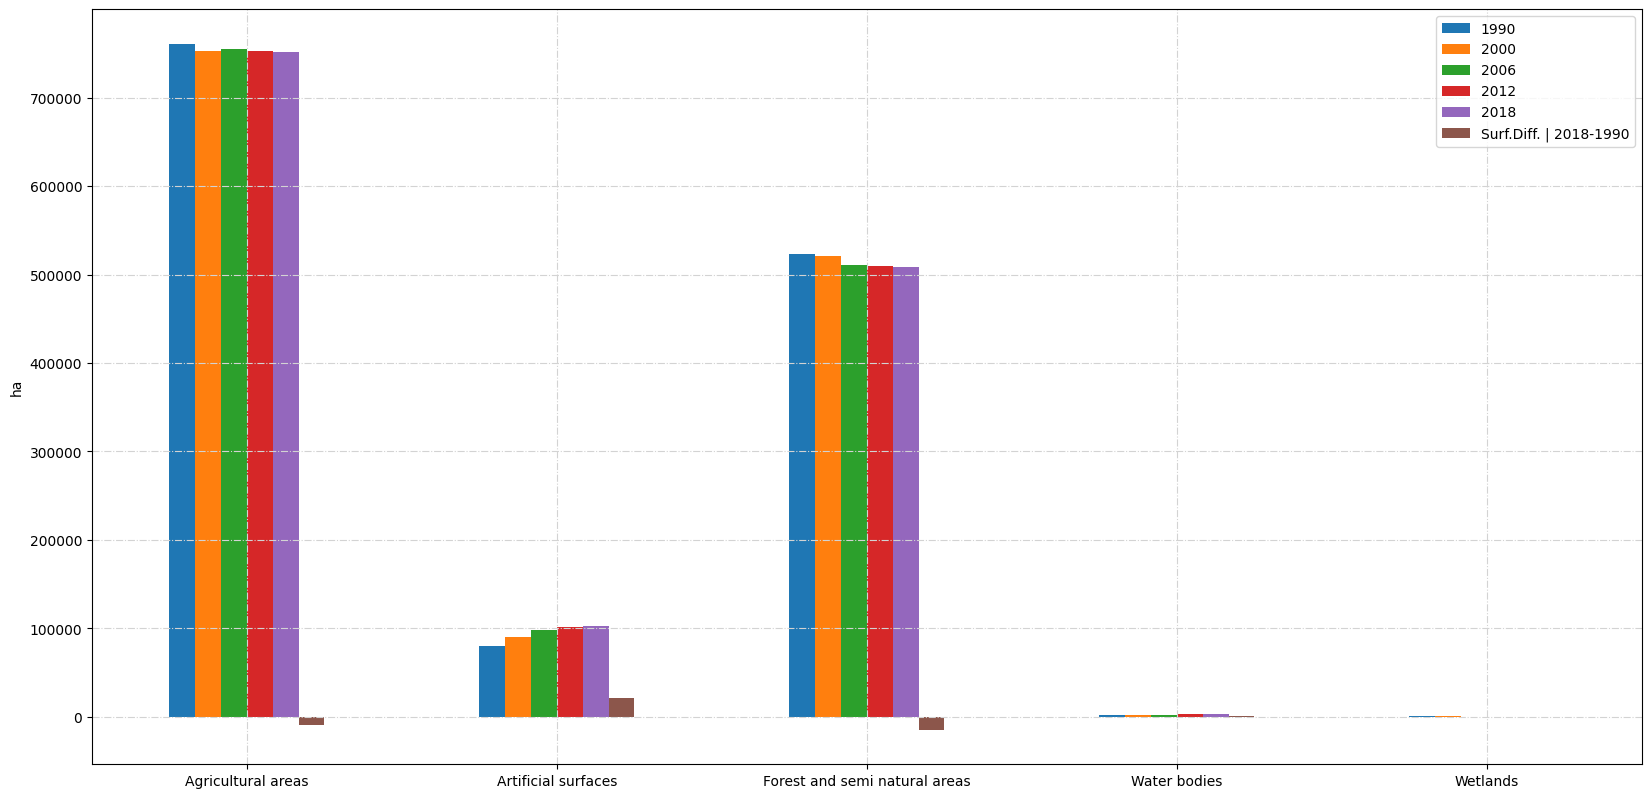

In [15]:
fig1 = plt.figure(figsize=(20, 10), dpi=100)
sub_fig = GridSpec(nrows=1, ncols=1, figure=fig1, hspace=0.35)
ax = fig1.add_subplot(sub_fig[0, 0])
lvl1_df.plot.bar(ax=ax, rot=0)

ax.yaxis.set_label_text('ha')
ax.set_xlabel('')
ax.grid(color='lightgrey', linestyle='dashdot')

plt.legend(loc='best')

E' visibile abbastanza chiaramente un netto aumento delle superfici artificiali con un conseguente arretramento di quelle forestate e di quelle agricole. Le aree forestate tra il 1990 ed il 2018 hanno subito un arretramento quasi doppio rispetto a quelle agricole e le superfici artificiali sono quelle che hanno maggiormente *"beneficiato"* di questo arretramento complessivo delle due classi di CLC. Si potrebbe dire che l'urbanizzato ha eroso foreste ed aree agricole in quasi 30 anni.

### 2.2.2 Grafici per il livello 2

In [16]:
lvl2 = [campania_clc1990_label2, campania_clc2000_label2, campania_clc2006_label2, campania_clc2012_label2, campania_clc2018_label2]
lvl2_df = reduce(lambda  left,right: pd.merge(left,right,on=['CORINE Land Cover - level 2'], how='outer'), lvl2)
lvl2_df.fillna(0, inplace=True)
lvl2_df.insert(loc=6, column='Surf.Diff. | 2000-1990', value=(lvl2_df.surface_ha_2000 - lvl2_df.surface_ha_1990))
lvl2_df.insert(loc=7, column='Surf.Diff. | 2006-2000', value=(lvl2_df.surface_ha_2006 - lvl2_df.surface_ha_2000))
lvl2_df.insert(loc=8, column='Surf.Diff. | 2012-2006', value=(lvl2_df.surface_ha_2012 - lvl2_df.surface_ha_2006))
lvl2_df.insert(loc=9, column='Surf.Diff. | 2018-2012', value=(lvl2_df.surface_ha_2018 - lvl2_df.surface_ha_2012))
lvl2_df.insert(loc=9, column='Surf.Diff. | 2018-1990', value=(lvl2_df.surface_ha_2018 - lvl2_df.surface_ha_1990))
lvl2_df.set_index('CORINE Land Cover - level 2', inplace=True)
lvl2_df = lvl2_df[['Surf.Diff. | 2000-1990', 'Surf.Diff. | 2006-2000', 'Surf.Diff. | 2012-2006', 'Surf.Diff. | 2018-2012', 'Surf.Diff. | 2018-1990']]
lvl2_df.sort_index(ascending=True, inplace=True)
lvl2_df

,Surf.Diff. | 2000-1990,Surf.Diff. | 2006-2000,Surf.Diff. | 2012-2006,Surf.Diff. | 2018-2012,Surf.Diff. | 2018-1990
CORINE Land Cover - level 2,,,,,
Arable land,-6226.9986,-15007.4805,1362.7374,26.9417,-19844.8000
"Artificial, non-agricultural vegetated areas",330.5367,-4.4113,58.5588,396.9458,781.6300
Forests,2963.0601,-4293.0050,1859.3801,-1391.9151,-862.4799
Heterogeneous agricultural areas,-947.6309,4546.7408,9331.1283,-448.2578,12481.9804
"Industrial, commercial and transport units",1550.4505,3173.2827,2094.7855,154.4961,6973.0148
Inland waters,602.2416,267.2776,398.3284,0.0000,1267.8476
Inland wetlands,-125.9913,-96.2252,-73.2778,0.0000,-295.4943
Marine waters,-0.0002,0.0001,86.7527,0.0000,86.7526
Maritime wetlands,0.0000,0.0000,25.8566,0.0000,25.8566


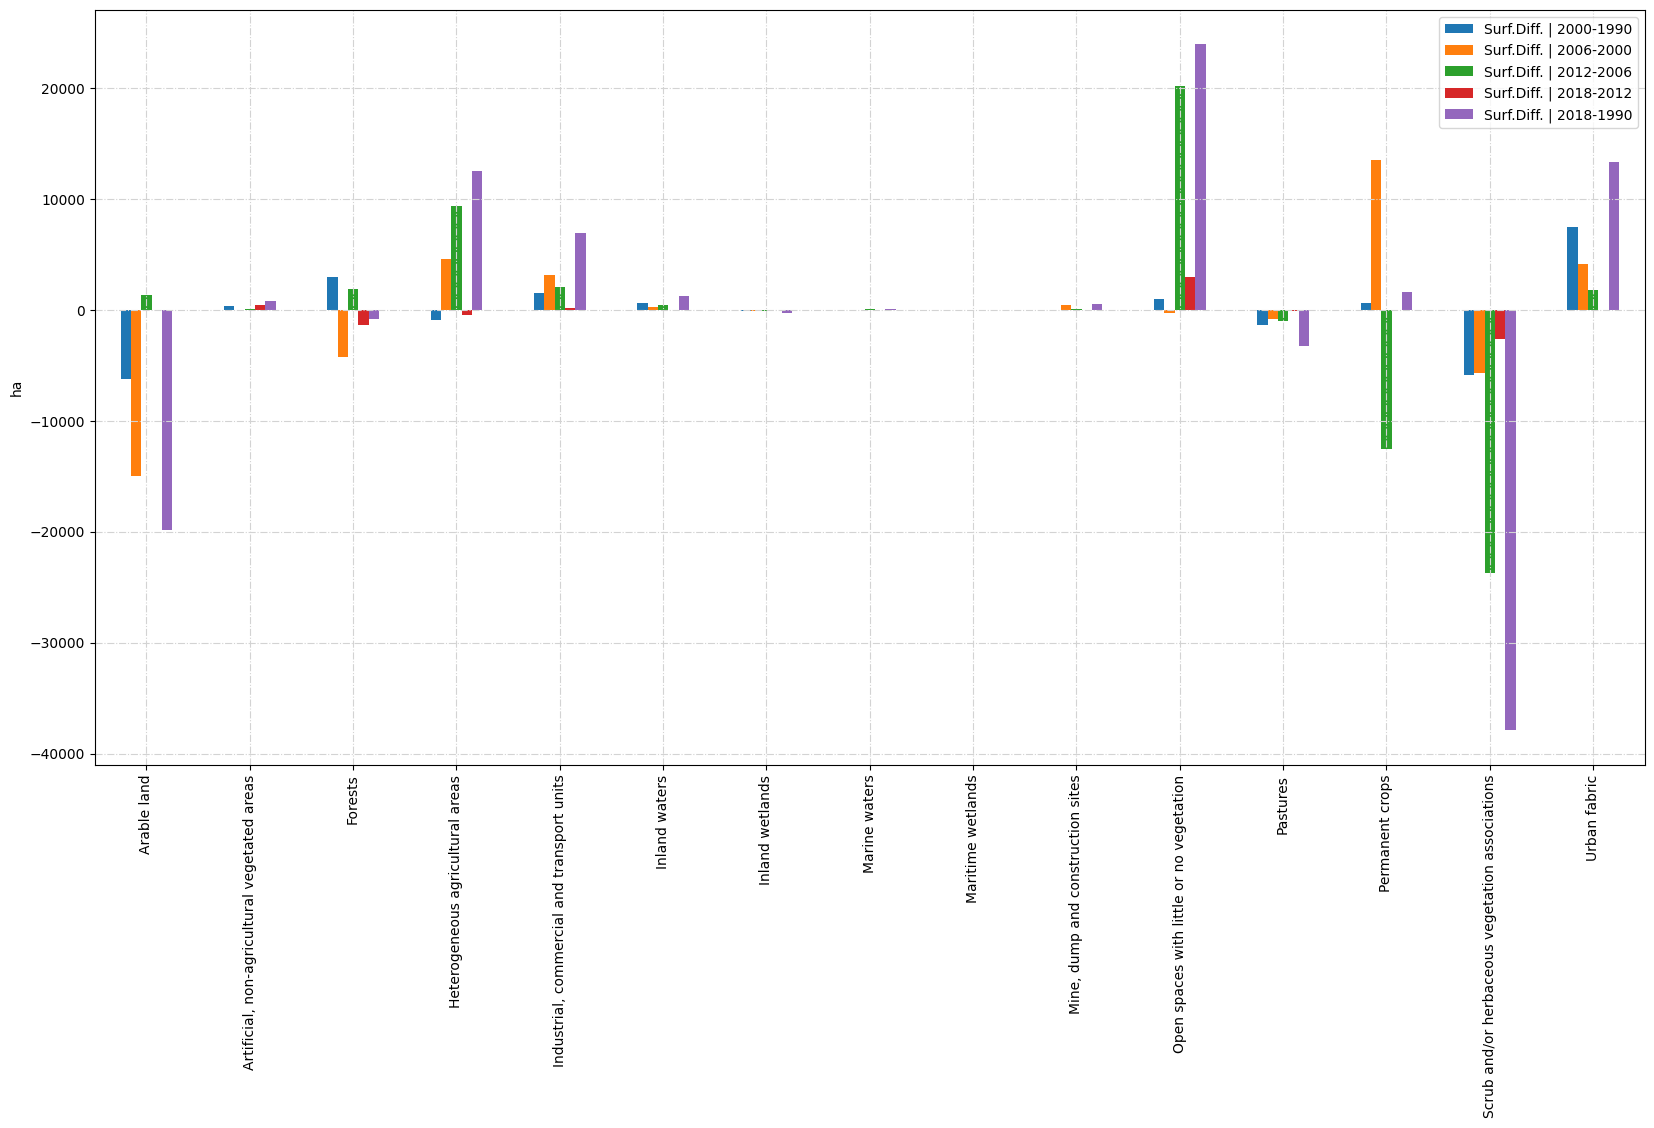

In [17]:
fig2 = plt.figure(figsize=(20, 10), dpi=100)
sub_fig = GridSpec(nrows=1, ncols=1, figure=fig2, hspace=0.35)
ax = fig2.add_subplot(sub_fig[0, 0])
lvl2_df.plot.bar(ax=ax, rot=0)

ax.yaxis.set_label_text('ha')
ax.set_xlabel('')
ax.grid(color='lightgrey', linestyle='dashdot')

plt.xticks(rotation = 90)
plt.legend(loc='best')

Scendendo di un livello, quindi andando ad approfondire di più il dato passando al secondo livello CLC, possiamo verificare i trend negativi a quali specifiche superfici fanno riferimento.

Le aree arbustive e con alberi radi hanno avuto la peggio, a seguire i terreni arabili, pascoli e foreste. Netto è invece l'aumento delle aree aperte, classe in cui nel terzo livello CLC ci sono le aree percorse dal fuoco(da tenere in mente per richiami successivi!). Seguono, nell'incremento, le aree urbanizzate, le aree per colture eterogenee e quelle per lo sviluppo di siti industriali e commerciali.



### 2.2.3 Grafici per il livello 3

In [18]:
lvl3 = [campania_clc1990_label3, campania_clc2000_label3, campania_clc2006_label3, campania_clc2012_label3, campania_clc2018_label3]
lvl3_df = reduce(lambda  left,right: pd.merge(left,right,on=['CORINE Land Cover - level 3'], how='outer'), lvl3)
lvl3_df.fillna(0, inplace=True)
lvl3_df.insert(loc=6, column='Surf.Diff. | 2000-1990', value=(lvl3_df.surface_ha_2000 - lvl3_df.surface_ha_1990))
lvl3_df.insert(loc=7, column='Surf.Diff. | 2006-2000', value=(lvl3_df.surface_ha_2006 - lvl3_df.surface_ha_2000))
lvl3_df.insert(loc=8, column='Surf.Diff. | 2012-2006', value=(lvl3_df.surface_ha_2012 - lvl3_df.surface_ha_2006))
lvl3_df.insert(loc=9, column='Surf.Diff. | 2018-2012', value=(lvl3_df.surface_ha_2018 - lvl3_df.surface_ha_2012))
lvl3_df.insert(loc=10, column='Surf.Diff. | 2018-1990', value=(lvl3_df.surface_ha_2018 - lvl3_df.surface_ha_1990))
lvl3_df.set_index('CORINE Land Cover - level 3', inplace=True)

lvl3_df.sort_index(ascending=True, inplace=True)
lvl3_df

,surface_ha_1990,surface_ha_2000,surface_ha_2006,surface_ha_2012,surface_ha_2018,Surf.Diff. | 2000-1990,Surf.Diff. | 2006-2000,Surf.Diff. | 2012-2006,Surf.Diff. | 2018-2012,Surf.Diff. | 2018-1990
CORINE Land Cover - level 3,,,,,,,,,,
Agro-forestry areas,420.5049,420.5224,140.9079,79.0823,79.0823,0.0175,-279.6145,-61.8256,0.000000e+00,-341.4226
Airports,383.8998,556.4307,556.4308,556.4308,556.4308,172.5309,0.0001,0.0000,0.000000e+00,172.5310
Annual crops associated with permanent crops,42881.8119,44016.3987,23501.2894,24459.1737,24062.2280,1134.5868,-20515.1093,957.8843,-3.969457e+02,-18819.5839
Bare rocks,1122.7257,1006.1738,979.8852,1274.5252,1274.5252,-116.5519,-26.2886,294.6400,0.000000e+00,151.7995
"Beaches, dunes, sands",2282.0112,1852.6891,1835.3037,1904.4059,1904.4059,-429.3221,-17.3854,69.1022,0.000000e+00,-377.6053
Broad-leaved forest,367521.2801,369187.8047,365453.4552,367034.3194,366436.4566,1666.5246,-3734.3495,1580.8642,-5.978628e+02,-1084.8235
Burnt areas,0.0000,354.7607,438.4148,770.8451,3802.9844,354.7607,83.6541,332.4303,3.032139e+03,3802.9844
Coastal lagoons,25.8567,25.8565,25.8566,112.6093,112.6093,-0.0002,0.0001,86.7527,0.000000e+00,86.7526
Complex cultivation patterns,165047.1097,162777.2069,181971.5611,185634.2569,185582.9448,-2269.9028,19194.3542,3662.6958,-5.131210e+01,20535.8351


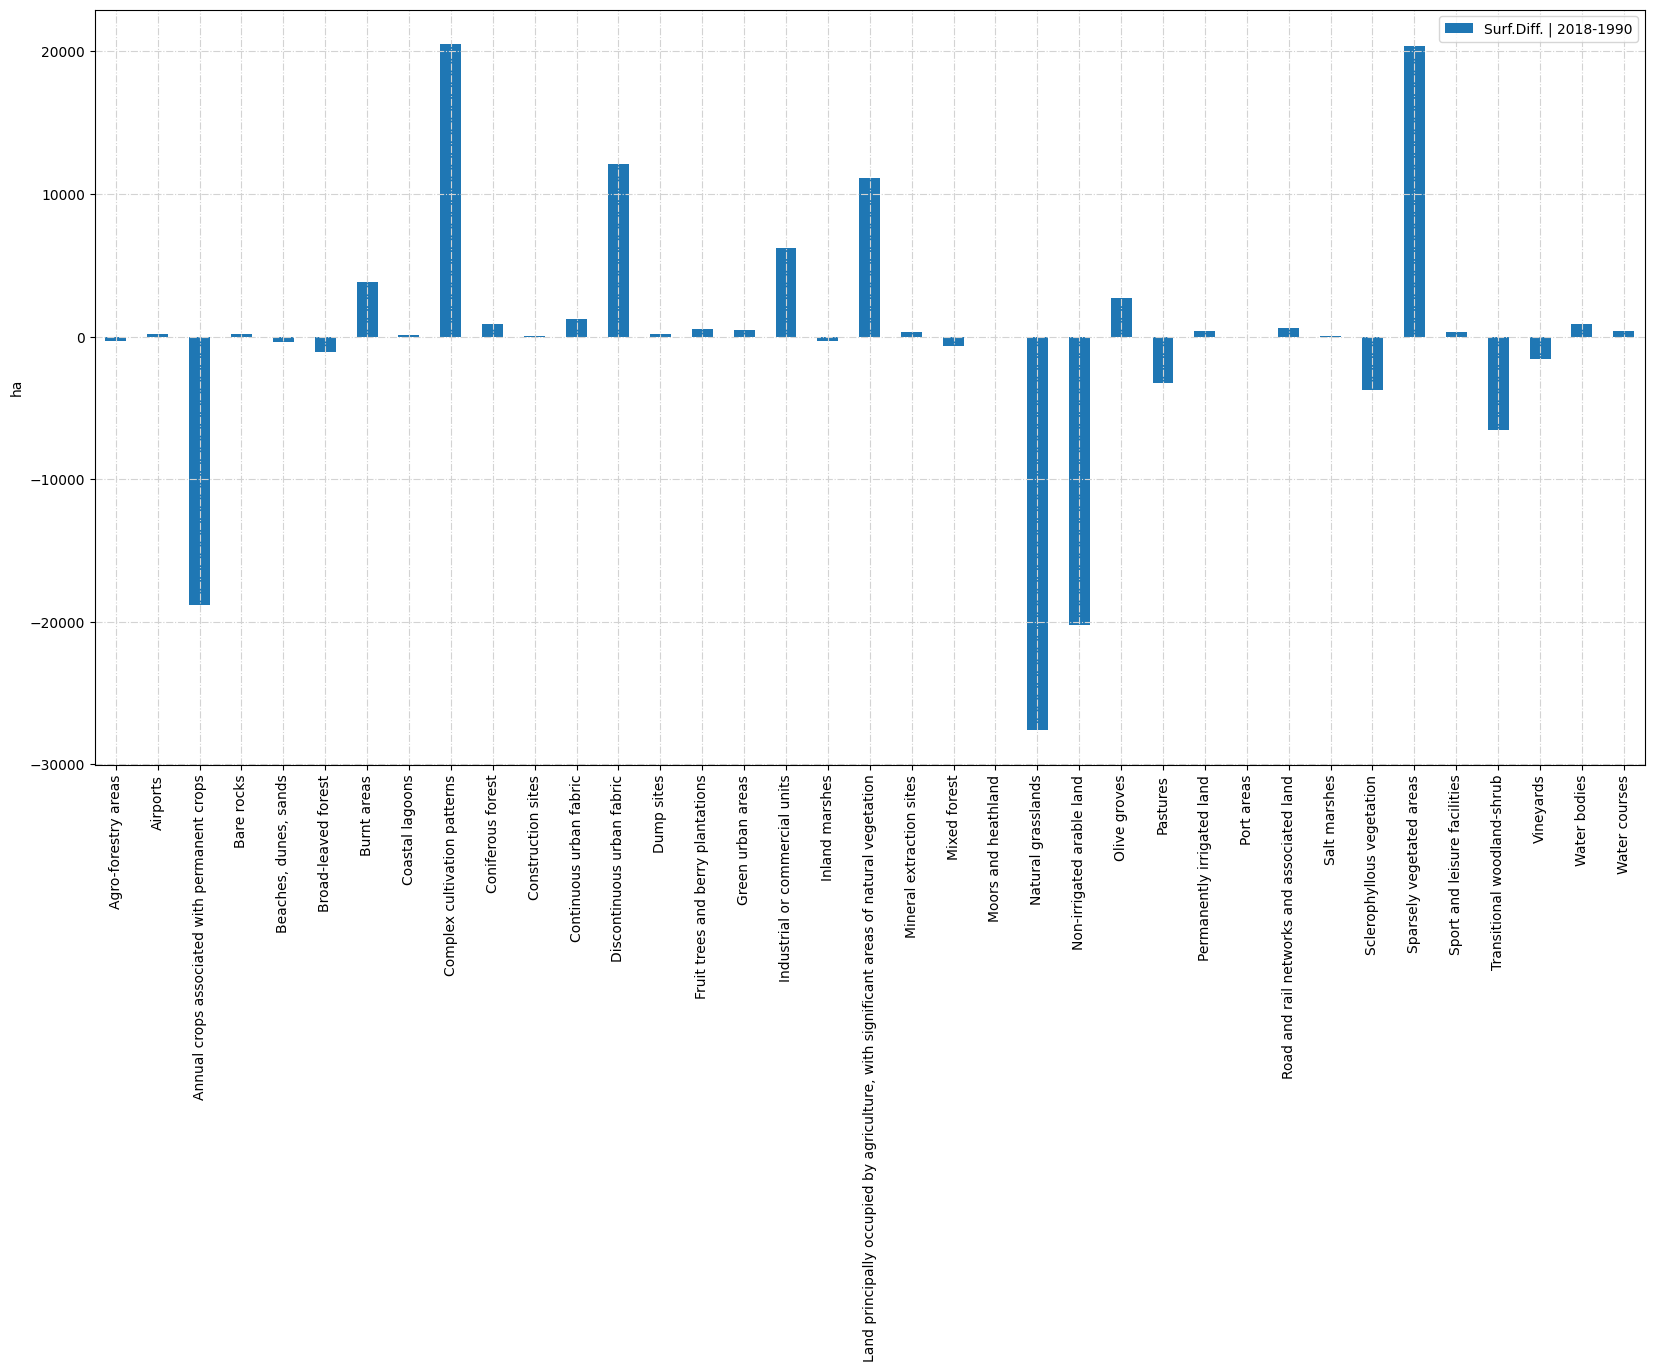

In [19]:
fig3 = plt.figure(figsize=(20, 10), dpi=100)
sub_fig = GridSpec(nrows=1, ncols=1, figure=fig3, hspace=0.35)
ax = fig3.add_subplot(sub_fig[0, 0])
lvl3_df['Surf.Diff. | 2018-1990'].plot.bar(ax=ax, rot=0)

ax.yaxis.set_label_text('ha')
ax.set_xlabel('')
ax.grid(color='lightgrey', linestyle='dashdot')

plt.xticks(rotation = 90)
plt.legend(loc='best')

Passando al livello tre della CLC, ho voluto graficare la sola differenza tra 1990 e 2018 per motivi di leggibilità del grafico. In termini di aumento di copertura del suolo c'è l'avanzamento, quasi identico, delle piccole aree destinate a colture annuali e delle aree con vegetazione frammentata. A seguire ci sono le aree urbane discontinue e quelle occupate da orti, vigneti e alberi da frutto.

**Una riflessione che mi sento di fare è che l'avanzamento del tessuto urbano discontinuo ha frazionato il territorio agricolo, generando aree a piccole colture agricole.**

Significativo anche l'aumento di estensione delle aree percorse dal fuoco.

I decrementi sono la cartina di tornasole degli incrementi che ho descritto poco fa e che potrebbero confermare la mia riflessione sul frazionamento del territorio naturale ed agricolo, portato avanti dall'avanzamento delle classi legati ai *suoli artificiali*.

## 2.3 Focus sui Comuni
L'analisi che segue tenta di rispondere alla domanda: ***"quali sono i Comuni campani in cui i fenomeni esposti poco fa hanno avuto un maggior impatto?"***

Mi concentrerò sul terzo livello della CLC, in particolare sulle aree artificiali, aree agricole e foreste ma anche sulle discariche, le aree percorse dal fuoco ed il verde urbano.

Visto che dal 2000 in poi l'accuratezza geometrica del dato CLC è aumentata considerevolmente, le analisi di dettaglio che seguono si concentreranno sulla differenza tra 2000 e 2018.

In [21]:

# Dati 1990
focus_1990 = clc1990_campania[['pro_com', 'comune', 'provincia', 'sup_com_ha', 'label3', 'surface_ha_1990']]
focus_1990.set_index('label3', inplace=True)
focus_1990_group = pd.DataFrame(focus_1990.groupby(['pro_com', 'comune', 'sup_com_ha', 'label3'])['surface_ha_1990'].sum())
focus_1990_group.reset_index(inplace=True)

# Dati 2000
focus_2000 = clc2000_campania[['pro_com', 'comune', 'provincia', 'sup_com_ha', 'label3', 'surface_ha_2000']]
focus_2000.set_index('label3', inplace=True)
focus_2000_group = pd.DataFrame(focus_2000.groupby(['pro_com', 'comune', 'sup_com_ha', 'label3'])['surface_ha_2000'].sum())
focus_2000_group.reset_index(inplace=True)

# Dati 2006
focus_2006 = clc2006_campania[['pro_com', 'comune', 'provincia', 'sup_com_ha', 'label3', 'surface_ha_2006']]
focus_2006.set_index('label3', inplace=True)
focus_2006_group = pd.DataFrame(focus_2006.groupby(['pro_com', 'comune', 'sup_com_ha', 'label3'])['surface_ha_2006'].sum())
focus_2006_group.reset_index(inplace=True)

# Dati 2012
focus_2012 = clc2012_campania[['pro_com', 'comune', 'provincia', 'sup_com_ha', 'label3', 'surface_ha_2012']]
focus_2012.set_index('label3', inplace=True)
focus_2012_group = pd.DataFrame(focus_2012.groupby(['pro_com', 'comune', 'sup_com_ha', 'label3'])['surface_ha_2012'].sum())
focus_2012_group.reset_index(inplace=True)

# Dati 2018
focus_2018 = clc2018_campania[['pro_com', 'comune', 'provincia', 'sup_com_ha', 'label3', 'surface_ha_2018']]
focus_2018.set_index('label3', inplace=True)
focus_2018_group = pd.DataFrame(focus_2018.groupby(['pro_com', 'comune', 'sup_com_ha', 'label3'])['surface_ha_2018'].sum())
focus_2018_group.reset_index(inplace=True)

In [22]:
focus_1990_group

,pro_com,comune,sup_com_ha,label3,surface_ha_1990
0,61001.0,Ailano,1605.560469,Broad-leaved forest,472.5747
1,61001.0,Ailano,1605.560469,Complex cultivation patterns,93.2780
2,61001.0,Ailano,1605.560469,Continuous urban fabric,31.0972
3,61001.0,Ailano,1605.560469,"Land principally occupied by agriculture, with...",188.9317
4,61001.0,Ailano,1605.560469,Non-irrigated arable land,752.7540
...,...,...,...,...,...
4543,65158.0,Bellizzi,802.200746,Continuous urban fabric,93.9079
4544,65158.0,Bellizzi,802.200746,Discontinuous urban fabric,40.9309
4545,65158.0,Bellizzi,802.200746,Fruit trees and berry plantations,24.3220
4546,65158.0,Bellizzi,802.200746,Non-irrigated arable land,426.7024


### 2.3.1 Aree artificiali
I gruppi 1.1 ed 1.2 della CLC

In [23]:

# Dati 1990
artificial_surface_1990 = focus_1990_group[focus_1990_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_1990_group = pd.DataFrame(artificial_surface_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
artificial_surface_1990_group.reset_index(inplace=True)

# Dati 2000
artificial_surface_2000 = focus_2000_group[focus_2000_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_2000_group = pd.DataFrame(artificial_surface_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
artificial_surface_2000_group.reset_index(inplace=True)

# Dati 2006
artificial_surface_2006 = focus_2006_group[focus_2006_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_2006_group = pd.DataFrame(artificial_surface_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
artificial_surface_2006_group.reset_index(inplace=True)

# Dati 2012
artificial_surface_2012 = focus_2012_group[focus_2012_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_2012_group = pd.DataFrame(artificial_surface_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
artificial_surface_2012_group.reset_index(inplace=True)

# Dati 2018
artificial_surface_2018 = focus_2018_group[focus_2018_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_2018_group = pd.DataFrame(artificial_surface_2018.groupby(['pro_com', 'comune', 'sup_com_ha'])['surface_ha_2018'].sum())
artificial_surface_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_artificial = [artificial_surface_2018_group, artificial_surface_2012_group, artificial_surface_2006_group, artificial_surface_2000_group, artificial_surface_1990_group]
focus_artificial_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_artificial)
focus_artificial_df = focus_artificial_df[focus_artificial_df['sup_com_ha'] > 0]
focus_artificial_df.fillna(0, inplace=True)
focus_artificial_df.insert(loc=3, column='perc_1990', value=round(focus_artificial_df.surface_ha_1990 / focus_artificial_df.sup_com_ha, 4) * 100)
focus_artificial_df.insert(loc=4, column='perc_2000', value=round(focus_artificial_df.surface_ha_2000 / focus_artificial_df.sup_com_ha, 4) * 100)
focus_artificial_df.insert(loc=5, column='perc_2006', value=round(focus_artificial_df.surface_ha_2006 / focus_artificial_df.sup_com_ha, 4) * 100)
focus_artificial_df.insert(loc=6, column='perc_2012', value=round(focus_artificial_df.surface_ha_2012 / focus_artificial_df.sup_com_ha, 4) * 100)
focus_artificial_df.insert(loc=7, column='perc_2018', value=round(focus_artificial_df.surface_ha_2018 / focus_artificial_df.sup_com_ha, 4) * 100)
focus_artificial_df.insert(loc=8, column='Perc.Diff. | 2018-2000', value=(focus_artificial_df.perc_2018 - focus_artificial_df.perc_2000))
focus_artificial_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
focus_artificial_df

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
201,63036.0,Grumo Nevano,287.688759,47.45,64.93,64.93,51.31,51.31,-13.62,147.6065,147.6065,186.8019,186.8019,136.5066
232,63067.0,San Giorgio a Cremano,415.383936,60.96,76.57,68.51,68.51,68.51,-8.06,284.5767,284.5767,284.5768,318.0615,253.2174
197,63032.0,Frattamaggiore,538.816178,58.54,71.14,72.46,63.97,63.97,-7.17,344.6705,344.6705,390.4469,383.2980,315.4185
476,65121.0,San Mango Piemonte,602.370147,7.81,7.81,3.14,3.14,3.14,-4.67,18.8890,18.8890,18.8890,47.0198,47.0222
137,62046.0,Pago Veiano,2374.895020,1.83,5.24,2.13,2.13,2.13,-3.11,50.6037,50.6037,50.6037,124.5097,43.5550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,63063.0,Quarto,1415.896056,24.40,24.95,26.90,39.26,39.26,14.31,555.9065,555.9065,380.8373,353.2075,345.4612
254,63089.0,Volla,620.630205,45.68,49.86,49.94,64.34,64.34,14.48,399.3008,399.3008,309.9351,309.4482,283.5034
212,63047.0,Monte di Procida,370.428037,31.25,31.25,31.25,48.28,48.28,17.03,178.8412,178.8412,115.7459,115.7458,115.7439
190,63025.0,Castello di Cisterna,392.135970,21.89,46.04,68.31,68.31,68.31,22.27,267.8514,267.8514,267.8514,180.5292,85.8311


In [24]:
# Superfici in arretramento
reduction_artificial_area = focus_artificial_df.iloc[0:10]
reduction_artificial_area

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
201,63036.0,Grumo Nevano,287.688759,47.45,64.93,64.93,51.31,51.31,-13.62,147.6065,147.6065,186.8019,186.8019,136.5066
232,63067.0,San Giorgio a Cremano,415.383936,60.96,76.57,68.51,68.51,68.51,-8.06,284.5767,284.5767,284.5768,318.0615,253.2174
197,63032.0,Frattamaggiore,538.816178,58.54,71.14,72.46,63.97,63.97,-7.17,344.6705,344.6705,390.4469,383.2980,315.4185
476,65121.0,San Mango Piemonte,602.370147,7.81,7.81,3.14,3.14,3.14,-4.67,18.8890,18.8890,18.8890,47.0198,47.0222
137,62046.0,Pago Veiano,2374.895020,1.83,5.24,2.13,2.13,2.13,-3.11,50.6037,50.6037,50.6037,124.5097,43.5550
485,65132.0,San Valentino Torio,915.632363,15.51,15.56,13.27,13.27,13.27,-2.29,121.4587,121.4587,121.4588,142.4372,141.9949
4,61005.0,Aversa,885.176217,59.33,67.87,67.96,66.24,66.24,-1.63,586.3294,586.3294,601.5394,600.7846,525.1697
170,63005.0,Arzano,473.103075,83.22,86.97,87.40,85.42,85.42,-1.55,404.1348,404.1348,413.4904,411.4785,393.7116
474,65119.0,San Giovanni a Piro,3790.148485,2.12,4.21,2.72,2.72,2.72,-1.49,103.0783,103.0783,103.0783,159.6782,80.3555
57,61067.0,Recale,321.954739,32.81,32.81,31.54,31.54,31.54,-1.27,101.5467,101.5467,101.5467,105.6199,105.6193


In [25]:
# Superfici in avanzamento
increase_artificial_area = focus_artificial_df.iloc[-10:]
increase_artificial_area.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
increase_artificial_area

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
380,65011.0,Atrani,12.061182,0.00,0.00,52.01,52.01,52.01,52.01,6.2730,6.2730,6.2730,0.0000,0.0000
190,63025.0,Castello di Cisterna,392.135970,21.89,46.04,68.31,68.31,68.31,22.27,267.8514,267.8514,267.8514,180.5292,85.8311
212,63047.0,Monte di Procida,370.428037,31.25,31.25,31.25,48.28,48.28,17.03,178.8412,178.8412,115.7459,115.7458,115.7439
254,63089.0,Volla,620.630205,45.68,49.86,49.94,64.34,64.34,14.48,399.3008,399.3008,309.9351,309.4482,283.5034
228,63063.0,Quarto,1415.896056,24.40,24.95,26.90,39.26,39.26,14.31,555.9065,555.9065,380.8373,353.2075,345.4612
82,61094.0,Trentola Ducenta,665.513019,30.18,30.19,31.44,44.05,44.05,13.86,293.1760,293.1760,209.2403,200.8859,200.8848
15,61016.0,Carinaro,631.593670,28.55,34.93,44.25,47.41,47.41,12.48,299.4077,299.4077,279.4878,220.6269,180.3185
80,61092.0,Teverola,669.906081,31.59,37.22,50.70,48.78,48.78,11.56,326.7535,326.7535,339.6324,249.3457,211.6063
188,63023.0,Casoria,1213.840286,57.66,72.14,72.14,83.48,83.48,11.34,1013.2593,1013.2593,875.7210,875.7214,699.8511
123,62032.0,Forchia,545.454120,0.00,0.00,0.00,11.00,11.00,11.00,59.9761,59.9761,0.0000,0.0000,0.0000


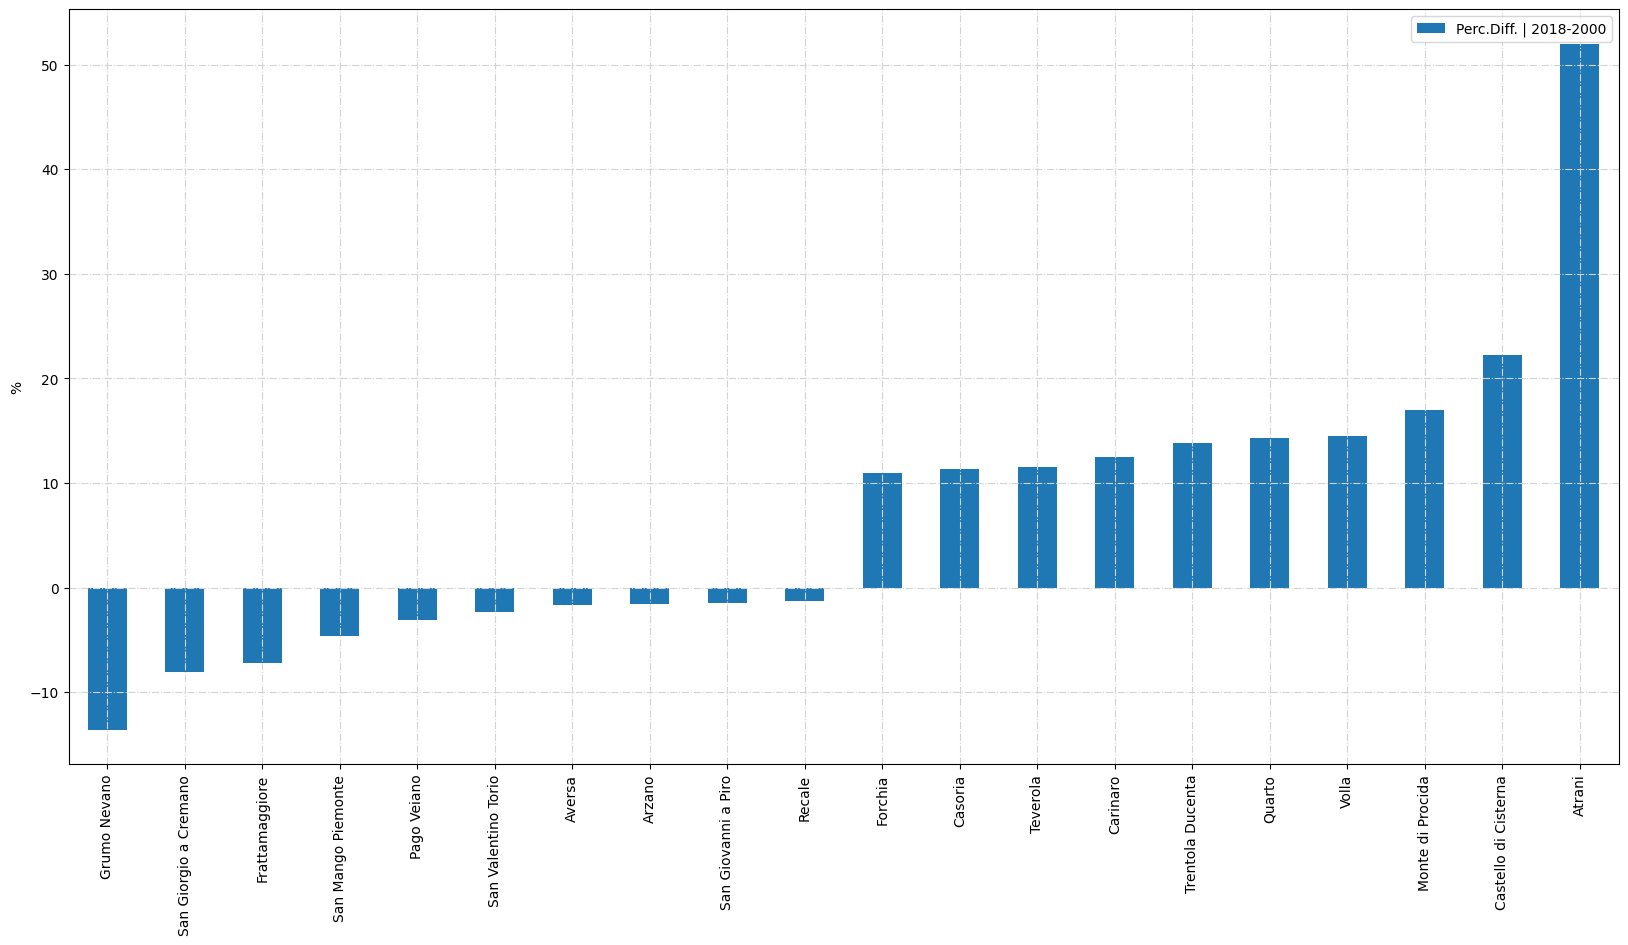

In [26]:
artificial_df = pd.concat([reduction_artificial_area, increase_artificial_area])
artificial_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
artificial_df = artificial_df[['comune', 'Perc.Diff. | 2018-2000']]
artificial_df['Perc.Diff. | 2018-2000'] = artificial_df['Perc.Diff. | 2018-2000']
artificial_df.set_index('comune', inplace=True)

fig_artificial = plt.figure(figsize=(20, 10), dpi=100)
sub_fig_artificial = GridSpec(nrows=1, ncols=1, figure=fig_artificial, hspace=0.35)
ax_artificial = fig_artificial.add_subplot(sub_fig_artificial[0, 0])
artificial_df.plot.bar(ax=ax_artificial, rot=0)

ax_artificial.yaxis.set_label_text('%')
ax_artificial.set_xlabel('')
ax_artificial.grid(color='lightgrey', linestyle='dashdot')

plt.xticks(rotation = 90)
plt.legend(loc='best')

Onestamente non so come interpretare l'arretramento delle aree artificiali, andrebbe fatta una ulteriore analisi per valutare se sono Comuni che si sono spopolati in quasi trenta anni.

L'aumento è abbastanza facile da indagare per me che sono del posto. Napoli ha una popolazione di quasi un milione di abitanti che triplica nei giorni feriali, per non parlare poi dei turisti. E' un'area molto congestionata con possibilità di nuova edilizia prossime allo zero; risulta normale quindi che Comuni più prossimi al Capoluogo di Regione stiano accogliendo "l'esubero" di popolazione. Faccio riferimento a Castello di Cisterna, Volla e Quarto.

Il caso di [Atrani](https://it.wikipedia.org/wiki/Atrani) è particolare perchè è il Comune più piccolo d'Italia ed è posto in una zona abbastanza impervia della costiera amalfitana; è probabile che nel 2000 non si sia data molta importanza all'area.

### 2.3.2 Aree forestate
Il gruppo 3.1 della CLC

In [27]:

# Dati 1990
forest_surface_1990 = focus_1990_group[focus_1990_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_1990_group = pd.DataFrame(forest_surface_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
forest_surface_1990_group.reset_index(inplace=True)

# Dati 2000
forest_surface_2000 = focus_2000_group[focus_2000_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_2000_group = pd.DataFrame(forest_surface_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
forest_surface_2000_group.reset_index(inplace=True)

# Dati 2006
forest_surface_2006 = focus_2006_group[focus_2006_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_2006_group = pd.DataFrame(forest_surface_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
forest_surface_2006_group.reset_index(inplace=True)

# Dati 2012
forest_surface_2012 = focus_2012_group[focus_2012_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_2012_group = pd.DataFrame(forest_surface_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
forest_surface_2012_group.reset_index(inplace=True)

# Dati 2018
forest_surface_2018 = focus_2018_group[focus_2018_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_2018_group = pd.DataFrame(forest_surface_2018.groupby(['pro_com', 'comune', 'sup_com_ha'])['surface_ha_2018'].sum())
forest_surface_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_forest = [forest_surface_2018_group, forest_surface_2012_group, forest_surface_2006_group, forest_surface_2000_group, forest_surface_1990_group]
focus_forest_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_forest)
focus_forest_df = focus_forest_df[focus_forest_df['sup_com_ha'] > 0]
focus_forest_df.fillna(0, inplace=True)
focus_forest_df.insert(loc=3, column='perc_1990', value=round(focus_forest_df.surface_ha_1990 / focus_forest_df.sup_com_ha, 4) * 100)
focus_forest_df.insert(loc=4, column='perc_2000', value=round(focus_forest_df.surface_ha_2000 / focus_forest_df.sup_com_ha, 4) * 100)
focus_forest_df.insert(loc=5, column='perc_2006', value=round(focus_forest_df.surface_ha_2006 / focus_forest_df.sup_com_ha, 4) * 100)
focus_forest_df.insert(loc=6, column='perc_2012', value=round(focus_forest_df.surface_ha_2012 / focus_forest_df.sup_com_ha, 4) * 100)
focus_forest_df.insert(loc=7, column='perc_2018', value=round(focus_forest_df.surface_ha_2018 / focus_forest_df.sup_com_ha, 4) * 100)
focus_forest_df.insert(loc=8, column='Perc.Diff. | 2018-2000', value=(focus_forest_df.perc_2018 - focus_forest_df.perc_2000))
focus_forest_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
focus_forest_df

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
139,62073.0,Solopaca,3112.664003,43.63,43.63,43.46,11.69,11.69,-31.94,363.9901,363.9901,1352.7210,1358.0359,1358.0275
143,62077.0,Vitulano,3599.050416,50.86,50.81,50.81,26.82,26.82,-23.99,965.1276,965.1276,1828.5273,1828.5272,1830.3353
410,65115.0,Salento,2378.507005,51.73,50.93,37.94,37.93,37.93,-13.00,902.2741,902.2741,902.4736,1211.3768,1230.4272
179,63082.0,Terzigno,2346.480829,20.68,20.68,20.68,20.68,8.01,-12.67,187.8420,485.2334,485.2333,485.2338,485.2356
147,63007.0,Barano d'Ischia,1096.089426,49.21,49.21,49.21,38.59,38.59,-10.62,422.9915,422.9915,539.3662,539.3660,539.3685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,65147.0,Torchiara,846.167482,20.76,20.76,20.86,29.14,29.14,8.38,246.5860,246.5860,176.5072,175.6504,175.6495
436,65144.0,Stella Cilento,1451.726154,39.51,43.25,43.25,52.64,52.64,9.39,764.2043,764.2043,627.8681,627.8690,573.5525
393,65098.0,Pollica,2816.525386,11.44,17.14,17.15,27.01,27.01,9.87,760.6785,760.6785,482.9555,482.8660,322.2088
359,65064.0,Lustra,1524.153297,34.01,34.02,34.02,44.61,44.61,10.59,679.9189,679.9189,518.4959,518.4971,518.4368


In [28]:
# Superfici in arretramento
reduction_forest_area = focus_forest_df.iloc[0:10]
reduction_forest_area

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
139,62073.0,Solopaca,3112.664003,43.63,43.63,43.46,11.69,11.69,-31.94,363.9901,363.9901,1352.7210,1358.0359,1358.0275
143,62077.0,Vitulano,3599.050416,50.86,50.81,50.81,26.82,26.82,-23.99,965.1276,965.1276,1828.5273,1828.5272,1830.3353
410,65115.0,Salento,2378.507005,51.73,50.93,37.94,37.93,37.93,-13.00,902.2741,902.2741,902.4736,1211.3768,1230.4272
179,63082.0,Terzigno,2346.480829,20.68,20.68,20.68,20.68,8.01,-12.67,187.8420,485.2334,485.2333,485.2338,485.2356
147,63007.0,Barano d'Ischia,1096.089426,49.21,49.21,49.21,38.59,38.59,-10.62,422.9915,422.9915,539.3662,539.3660,539.3685
304,65006.0,Amalfi,570.014402,48.51,48.51,38.86,38.86,38.86,-9.65,221.4838,221.4838,221.4838,276.5111,276.5144
170,63064.0,Ercolano,1989.359843,21.47,21.26,21.26,17.39,11.75,-9.51,233.6730,345.9226,422.9398,422.9397,427.1795
155,63035.0,Gragnano,1464.244074,53.35,53.35,52.42,44.07,44.07,-9.28,645.3063,645.3063,767.6083,781.1773,781.1751
159,63041.0,Marano di Napoli,1565.253641,13.09,13.09,13.09,3.98,3.98,-9.11,62.3734,62.3734,204.9146,204.9145,204.9150
183,63091.0,Trecase,621.312671,8.86,8.86,8.86,8.86,0.08,-8.78,0.4777,55.0368,55.0368,55.0368,55.0371


In [29]:
# Superfici in avanzamento
increase_forest_area = focus_forest_df.iloc[-10:]
increase_forest_area.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
increase_forest_area

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
408,65113.0,Sacco,2365.702940,42.11,42.02,42.02,63.01,63.01,20.99,1490.6391,1490.6391,994.0414,994.0408,996.2456
359,65064.0,Lustra,1524.153297,34.01,34.02,34.02,44.61,44.61,10.59,679.9189,679.9189,518.4959,518.4971,518.4368
393,65098.0,Pollica,2816.525386,11.44,17.14,17.15,27.01,27.01,9.87,760.6785,760.6785,482.9555,482.8660,322.2088
436,65144.0,Stella Cilento,1451.726154,39.51,43.25,43.25,52.64,52.64,9.39,764.2043,764.2043,627.8681,627.8690,573.5525
439,65147.0,Torchiara,846.167482,20.76,20.76,20.86,29.14,29.14,8.38,246.5860,246.5860,176.5072,175.6504,175.6495
405,65110.0,Romagnano al Monte,966.995480,18.35,18.35,18.35,26.64,26.64,8.29,257.5984,257.5984,177.4251,177.4254,177.4249
151,63022.0,Casola di Napoli,259.318212,34.28,34.28,42.15,42.15,42.15,7.87,109.3078,109.3078,109.3078,88.8917,88.8916
102,62036.0,Ginestra degli Schiavoni,1478.706162,22.20,22.20,22.20,29.90,29.90,7.70,442.1457,442.1457,328.2494,328.2500,328.2562
229,64045.0,Luogosano,606.809422,10.43,12.63,12.63,18.42,18.42,5.79,111.7932,111.7932,76.6287,76.6287,63.2980
355,65060.0,Laureana Cilento,1374.420460,25.62,25.64,25.64,30.10,31.15,5.51,428.1047,413.7489,352.3810,352.3819,352.1644


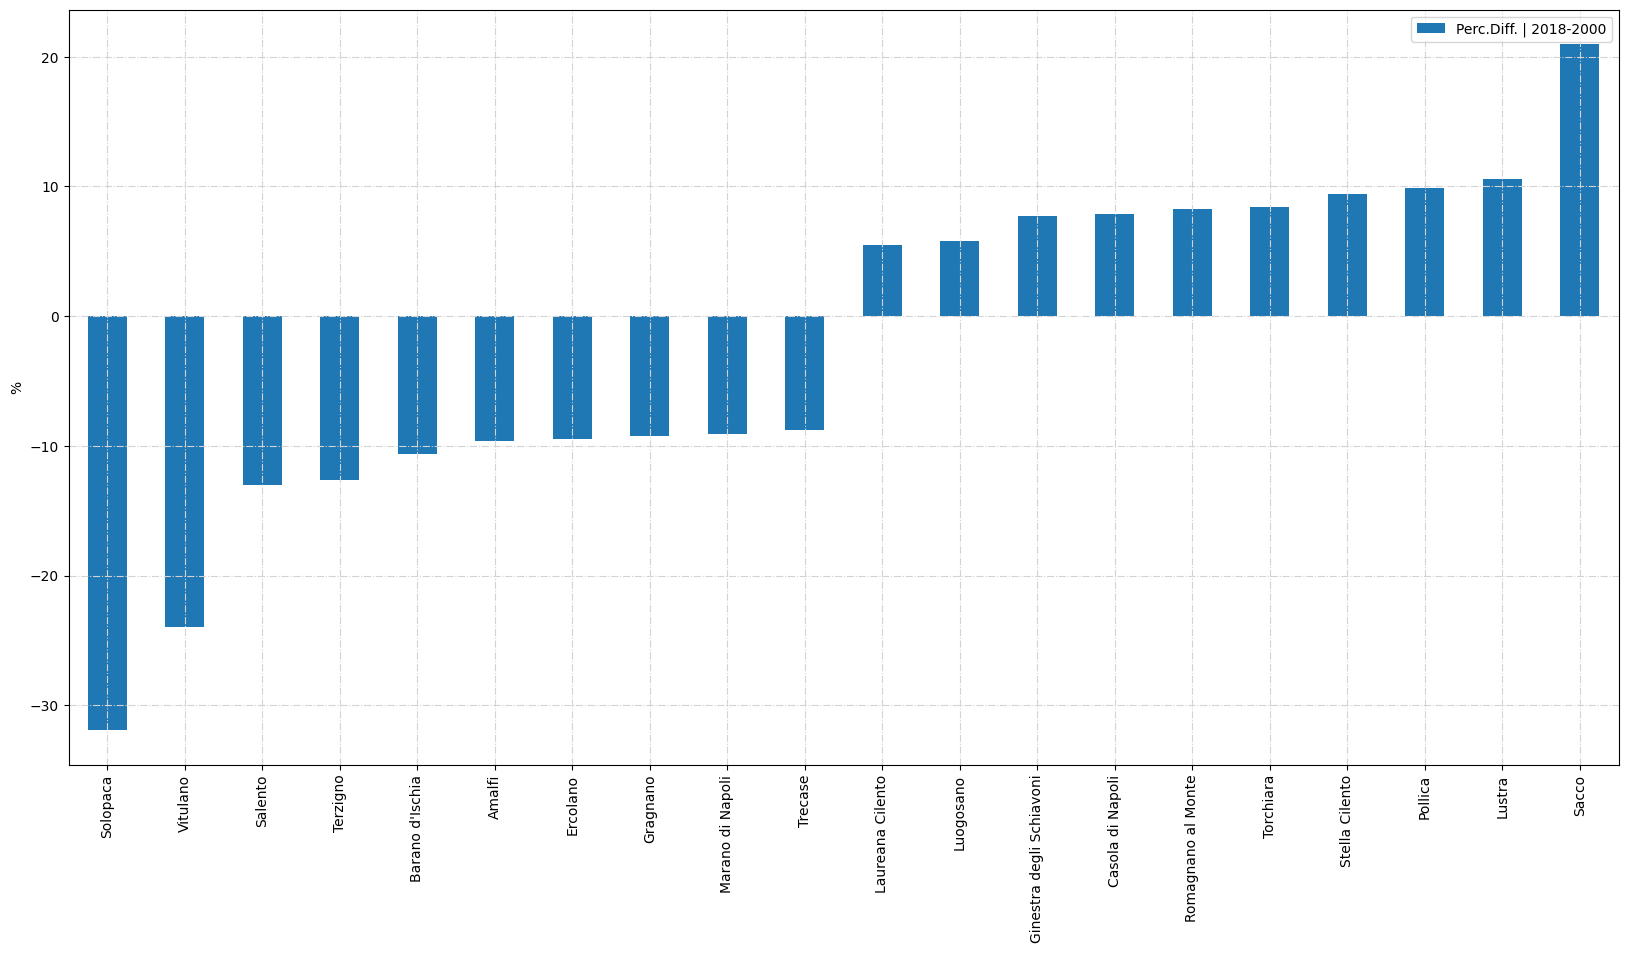

In [30]:
forest_df = pd.concat([reduction_forest_area, increase_forest_area])
forest_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
forest_df = forest_df[['comune', 'Perc.Diff. | 2018-2000']]
forest_df['Perc.Diff. | 2018-2000'] = forest_df['Perc.Diff. | 2018-2000']
forest_df.set_index('comune', inplace=True)

fig_forest = plt.figure(figsize=(20, 10), dpi=100)
sub_fig_forest = GridSpec(nrows=1, ncols=1, figure=fig_forest, hspace=0.35)
ax_forest = fig_forest.add_subplot(sub_fig_forest[0, 0])
forest_df.plot.bar(ax=ax_forest, rot=0)

ax_forest.yaxis.set_label_text('%')
ax_forest.set_xlabel('')
ax_forest.grid(color='lightgrey', linestyle='dashdot')

plt.xticks(rotation = 90)
plt.legend(loc='best')

E' significativo per me che nella top 10 del decremento di aree forestate ci siano Terzigno, Ercolano e Trecase. Lo è perchè sono tra i Comuni ricadenti nell'area del Parco Nazionale del Vesuvio che hanno subito danni al patrimonio boschivo a causa dell'[incendio che ci fu nel 2017](https://massimilianomoraca.it/blog/gis/analisi-temporale-sullarea-degli-incendi-del-vesuvio/).

Le aree in cui i boschi avanzano sono perlopiu aree rurali, a vocazione agricola, che pian piano si stanno spopolando.

### 2.3.3 Aree agricole
Il gruppo 2.1 della CLC

In [31]:

# Dati 1990
arable_lands_surface_1990 = focus_1990_group[focus_1990_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_1990_group = pd.DataFrame(arable_lands_surface_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
arable_lands_surface_1990_group.reset_index(inplace=True)

# Dati 2000
arable_lands_surface_2000 = focus_2000_group[focus_2000_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_2000_group = pd.DataFrame(arable_lands_surface_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
arable_lands_surface_2000_group.reset_index(inplace=True)

# Dati 2006
arable_lands_surface_2006 = focus_2006_group[focus_2006_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_2006_group = pd.DataFrame(arable_lands_surface_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
arable_lands_surface_2006_group.reset_index(inplace=True)

# Dati 2012
arable_lands_surface_2012 = focus_2012_group[focus_2012_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_2012_group = pd.DataFrame(arable_lands_surface_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
arable_lands_surface_2012_group.reset_index(inplace=True)

# Dati 2018
arable_lands_surface_2018 = focus_2018_group[focus_2018_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_2018_group = pd.DataFrame(arable_lands_surface_2018.groupby(['pro_com', 'comune', 'sup_com_ha'])['surface_ha_2018'].sum())
arable_lands_surface_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_arable_lands = [arable_lands_surface_2018_group, arable_lands_surface_2012_group, arable_lands_surface_2006_group, arable_lands_surface_2000_group, arable_lands_surface_1990_group]
focus_arable_lands_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_arable_lands)
focus_arable_lands_df = focus_arable_lands_df[focus_arable_lands_df['sup_com_ha'] > 0]
focus_arable_lands_df.fillna(0, inplace=True)
focus_arable_lands_df.insert(loc=3, column='perc_1990', value=round(focus_arable_lands_df.surface_ha_1990 / focus_arable_lands_df.sup_com_ha, 4) * 100)
focus_arable_lands_df.insert(loc=4, column='perc_2000', value=round(focus_arable_lands_df.surface_ha_2000 / focus_arable_lands_df.sup_com_ha, 4) * 100)
focus_arable_lands_df.insert(loc=5, column='perc_2006', value=round(focus_arable_lands_df.surface_ha_2006 / focus_arable_lands_df.sup_com_ha, 4) * 100)
focus_arable_lands_df.insert(loc=6, column='perc_2012', value=round(focus_arable_lands_df.surface_ha_2012 / focus_arable_lands_df.sup_com_ha, 4) * 100)
focus_arable_lands_df.insert(loc=7, column='perc_2018', value=round(focus_arable_lands_df.surface_ha_2018 / focus_arable_lands_df.sup_com_ha, 4) * 100)
focus_arable_lands_df.insert(loc=8, column='Perc.Diff. | 2018-2000', value=(focus_arable_lands_df.perc_2018 - focus_arable_lands_df.perc_2000))
focus_arable_lands_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
focus_arable_lands_df

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
238,64072.0,Pietradefusi,924.149874,77.90,77.90,20.16,20.16,20.16,-57.74,186.3344,186.3344,186.3345,719.9375,719.9308
229,64056.0,Montefusco,823.823558,59.13,59.13,2.01,2.01,2.01,-57.12,16.5238,16.5238,16.5238,487.1327,487.1269
250,64093.0,Santa Paolina,843.429641,29.95,29.95,0.25,0.25,0.25,-29.70,2.0832,2.0832,2.0832,252.5909,252.5864
189,63089.0,Volla,620.630205,33.87,29.74,29.74,1.05,1.05,-28.69,6.5071,6.5071,184.6057,184.6056,210.2015
260,64110.0,Torre Le Nocelle,1004.158412,43.42,43.42,17.52,17.52,17.52,-25.90,175.8839,175.8839,175.8840,436.0116,436.0185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,62049.0,Paupisi,683.272709,0.00,0.00,0.00,23.31,23.31,23.31,159.2668,159.2668,0.0000,0.0000,0.0000
13,61016.0,Carinaro,631.593670,13.06,9.15,9.15,41.13,41.13,31.98,259.7728,259.7728,57.8113,57.8112,82.5094
17,61020.0,Casaluce,955.842829,0.70,0.70,0.70,60.53,60.53,59.83,578.6141,578.6141,6.7225,6.7226,6.7222
32,61037.0,Frignano,985.795577,0.00,0.00,0.00,69.03,69.03,69.03,680.5149,680.5149,0.0000,0.0000,0.0000


In [32]:

# Superfici in arretramento
reduction_arable_lands_area = focus_arable_lands_df.iloc[0:10]
reduction_arable_lands_area

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
238,64072.0,Pietradefusi,924.149874,77.90,77.90,20.16,20.16,20.16,-57.74,186.3344,186.3344,186.3345,719.9375,719.9308
229,64056.0,Montefusco,823.823558,59.13,59.13,2.01,2.01,2.01,-57.12,16.5238,16.5238,16.5238,487.1327,487.1269
250,64093.0,Santa Paolina,843.429641,29.95,29.95,0.25,0.25,0.25,-29.70,2.0832,2.0832,2.0832,252.5909,252.5864
189,63089.0,Volla,620.630205,33.87,29.74,29.74,1.05,1.05,-28.69,6.5071,6.5071,184.6057,184.6056,210.2015
260,64110.0,Torre Le Nocelle,1004.158412,43.42,43.42,17.52,17.52,17.52,-25.90,175.8839,175.8839,175.8840,436.0116,436.0185
190,63090.0,Santa Maria la Carità,397.883761,24.44,24.44,0.29,0.29,0.29,-24.15,1.1544,1.1544,1.1544,97.2554,97.2552
76,61088.0,Sessa Aurunca,16218.704457,25.28,25.35,2.23,2.56,2.56,-22.79,415.3546,415.3546,362.1214,4112.0036,4099.7632
166,63025.0,Castello di Cisterna,392.135970,44.25,44.25,21.85,21.85,21.85,-22.40,85.6953,85.6953,85.6953,173.5036,173.5048
232,64059.0,Montemiletto,2163.480616,34.90,33.95,14.70,14.70,14.70,-19.25,318.1006,318.1006,318.1007,734.5263,755.1347
163,63017.0,Casalnuovo di Napoli,783.538578,44.85,41.66,41.66,27.45,27.45,-14.21,215.1126,215.1126,326.3900,326.3901,351.4509


In [33]:

# Superfici in avanzamento
increase_arable_lands_area = focus_arable_lands_df.iloc[-10:]
increase_arable_lands_area.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
increase_arable_lands_area

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
84,61098.0,Villa di Briano,854.692612,3.91,3.91,3.91,74.03,74.03,70.12,632.7436,632.7436,33.4422,33.4424,33.4453
32,61037.0,Frignano,985.795577,0.00,0.00,0.00,69.03,69.03,69.03,680.5149,680.5149,0.0000,0.0000,0.0000
17,61020.0,Casaluce,955.842829,0.70,0.70,0.70,60.53,60.53,59.83,578.6141,578.6141,6.7225,6.7226,6.7222
13,61016.0,Carinaro,631.593670,13.06,9.15,9.15,41.13,41.13,31.98,259.7728,259.7728,57.8113,57.8112,82.5094
130,62049.0,Paupisi,683.272709,0.00,0.00,0.00,23.31,23.31,23.31,159.2668,159.2668,0.0000,0.0000,0.0000
143,62062.0,San Lorenzo Maggiore,1629.550368,0.93,0.93,0.93,18.00,18.00,17.07,293.3587,293.3587,15.1138,15.1136,15.1112
134,62053.0,Ponte,1791.529818,18.98,18.98,18.11,35.86,35.86,16.88,642.4110,642.4110,324.5012,339.9875,339.9830
217,64037.0,Greci,3026.329172,33.15,34.35,50.04,50.02,50.02,15.67,1513.7004,1513.7004,1514.3325,1039.4665,1003.1417
36,61043.0,Gricignano di Aversa,997.757144,27.33,19.84,19.70,35.43,35.43,15.59,353.4710,353.4710,196.5586,197.9250,272.6607
63,61074.0,San Cipriano d'Aversa,619.009752,44.14,44.14,43.49,56.38,56.38,12.24,348.9748,348.9748,269.2010,273.2419,273.2415


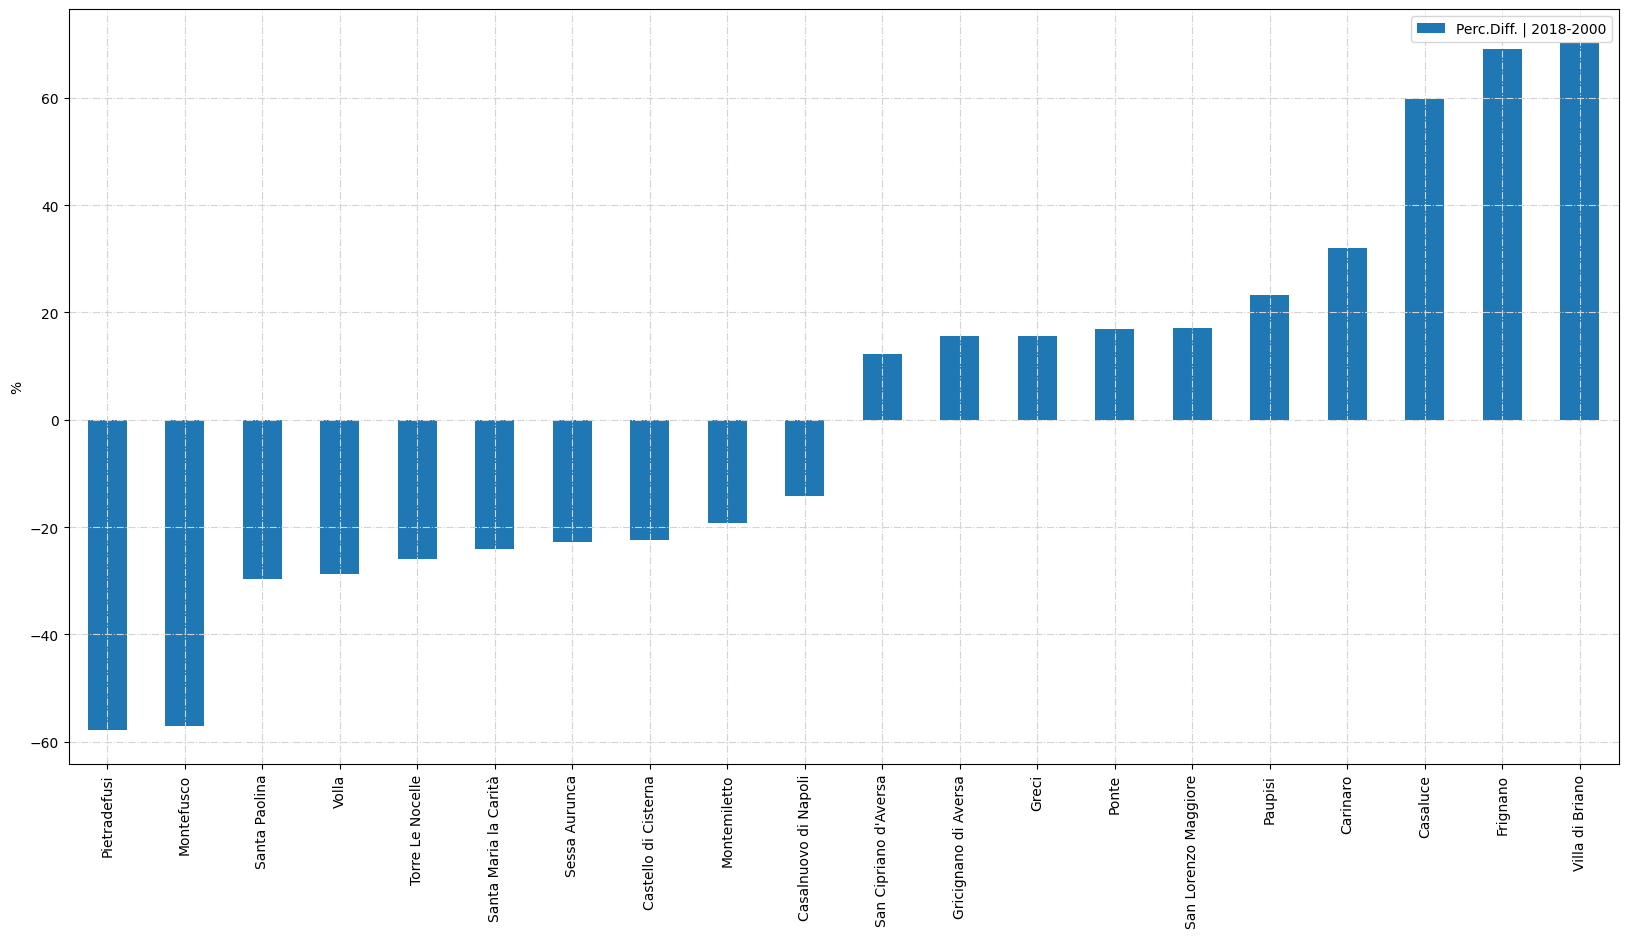

In [34]:
arable_lands_df = pd.concat([reduction_arable_lands_area, increase_arable_lands_area])
arable_lands_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
arable_lands_df = arable_lands_df[['comune', 'Perc.Diff. | 2018-2000']]
arable_lands_df['Perc.Diff. | 2018-2000'] = arable_lands_df['Perc.Diff. | 2018-2000']
arable_lands_df.set_index('comune', inplace=True)

fig_arable_lands = plt.figure(figsize=(20, 10), dpi=100)
sub_fig_arable_lands = GridSpec(nrows=1, ncols=1, figure=fig_arable_lands, hspace=0.35)
ax_arable_lands = fig_arable_lands.add_subplot(sub_fig_arable_lands[0, 0])
arable_lands_df.plot.bar(ax=ax_arable_lands, rot=0)

ax_arable_lands.yaxis.set_label_text('%')
ax_arable_lands.set_xlabel('')
ax_arable_lands.grid(color='lightgrey', linestyle='dashdot')

plt.xticks(rotation = 90)
plt.legend(loc='best')

Tra i Comuni con maggior aumento della aree articifiali abbiamo visto che c'è Volla che è tra i Comuni con maggior decremento delle aree agricole. Poco sopra ho fatto una riflessione sul perchè della redistribuzione del livello 1 della CLC. **Due indizi non fanno una prova, ma tre?**

### 2.3.4 Aree bruciate


In [35]:

# Dati 1990
burnt_surface_1990 = focus_1990_group[focus_1990_group['label3'].isin(['Burnt areas'])]
burnt_surface_1990_group = pd.DataFrame(burnt_surface_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
burnt_surface_1990_group.reset_index(inplace=True)

# Dati 2000
burnt_surface_2000 = focus_2000_group[focus_2000_group['label3'].isin(['Burnt areas'])]
burnt_surface_2000_group = pd.DataFrame(burnt_surface_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
burnt_surface_2000_group.reset_index(inplace=True)

# Dati 2006
burnt_surface_2006 = focus_2006_group[focus_2006_group['label3'].isin(['Burnt areas'])]
burnt_surface_2006_group = pd.DataFrame(burnt_surface_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
burnt_surface_2006_group.reset_index(inplace=True)

# Dati 2012
burnt_surface_2012 = focus_2012_group[focus_2012_group['label3'].isin(['Burnt areas'])]
burnt_surface_2012_group = pd.DataFrame(burnt_surface_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
burnt_surface_2012_group.reset_index(inplace=True)

# Dati 2018
burnt_surface_2018 = focus_2018_group[focus_2018_group['label3'].isin(['Burnt areas'])]
burnt_surface_2018_group = pd.DataFrame(burnt_surface_2018.groupby(['pro_com', 'comune', 'sup_com_ha'])['surface_ha_2018'].sum())
burnt_surface_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_arable_lands = [burnt_surface_2018_group, burnt_surface_2012_group, burnt_surface_2006_group, burnt_surface_2000_group, burnt_surface_1990_group]
focus_burnt_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_arable_lands)
focus_burnt_df = focus_burnt_df[focus_burnt_df['sup_com_ha'] > 0]
focus_burnt_df.fillna(0, inplace=True)
focus_burnt_df.insert(loc=3, column='perc_1990', value=round(focus_burnt_df.surface_ha_1990 / focus_burnt_df.sup_com_ha, 4) * 100)
focus_burnt_df.insert(loc=4, column='perc_2000', value=round(focus_burnt_df.surface_ha_2000 / focus_burnt_df.sup_com_ha, 4) * 100)
focus_burnt_df.insert(loc=5, column='perc_2006', value=round(focus_burnt_df.surface_ha_2006 / focus_burnt_df.sup_com_ha, 4) * 100)
focus_burnt_df.insert(loc=6, column='perc_2012', value=round(focus_burnt_df.surface_ha_2012 / focus_burnt_df.sup_com_ha, 4) * 100)
focus_burnt_df.insert(loc=7, column='perc_2018', value=round(focus_burnt_df.surface_ha_2018 / focus_burnt_df.sup_com_ha, 4) * 100)
focus_burnt_df.insert(loc=8, column='Perc.Diff. | 2018-2000', value=(focus_burnt_df.perc_2018 - focus_burnt_df.perc_2000))
focus_burnt_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
focus_burnt_df

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
20,63082.0,Terzigno,2346.480829,0.0,0.00,0.00,0.00,18.50,18.50,434.1155,0.0000,0.0000,0.0000,0.0
16,63064.0,Ercolano,1989.359843,0.0,0.00,0.00,8.49,17.54,17.54,348.9169,168.9727,0.0000,0.0000,0.0
10,63009.0,Boscotrecase,753.047593,0.0,0.00,0.00,0.00,16.95,16.95,127.6552,0.0000,0.0000,0.0000,0.0
22,63091.0,Trecase,621.312671,0.0,0.00,0.00,0.00,13.75,13.75,85.4539,0.0000,0.0000,0.0000,0.0
13,63051.0,Ottaviano,2002.268341,0.0,0.00,0.00,0.88,12.06,12.06,241.4028,17.6023,0.0000,0.0000,0.0
50,65142.0,Siano,856.918877,0.0,0.00,0.00,0.00,10.24,10.24,87.7539,0.0000,0.0000,0.0000,0.0
24,64076.0,Quadrelle,693.114011,0.0,0.00,0.00,0.00,9.65,9.65,66.9010,0.0000,0.0000,0.0000,0.0
21,63084.0,Torre del Greco,3066.110669,0.0,0.00,0.00,1.58,9.19,9.19,281.8574,48.5022,0.0000,0.0000,0.0
11,63041.0,Marano di Napoli,1565.253641,0.0,0.00,0.00,9.11,9.11,9.11,142.5412,142.5412,0.0000,0.0000,0.0
45,65108.0,Roccapiemonte,531.325342,0.0,3.85,0.00,0.00,10.68,6.83,56.7487,0.0000,0.0000,20.4508,0.0


In questa analisi ci sono in 6 delle prime 10 posizioni alcuni dei Comuni interessati dall'incendio del 2017.

### 2.3.5 Aree adibite a discarica

In [36]:

# Dati 1990
dump_surface_1990 = focus_1990_group[focus_1990_group['label3'].isin(['Dump sites'])]
dump_surface_1990_group = pd.DataFrame(dump_surface_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
dump_surface_1990_group.reset_index(inplace=True)

# Dati 2000
dump_surface_2000 = focus_2000_group[focus_2000_group['label3'].isin(['Dump sites'])]
dump_surface_2000_group = pd.DataFrame(dump_surface_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
dump_surface_2000_group.reset_index(inplace=True)

# Dati 2006
dump_surface_2006 = focus_2006_group[focus_2006_group['label3'].isin(['Dump sites'])]
dump_surface_2006_group = pd.DataFrame(dump_surface_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
dump_surface_2006_group.reset_index(inplace=True)

# Dati 2012
dump_surface_2012 = focus_2012_group[focus_2012_group['label3'].isin(['Dump sites'])]
dump_surface_2012_group = pd.DataFrame(dump_surface_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
dump_surface_2012_group.reset_index(inplace=True)

# Dati 2018
dump_surface_2018 = focus_2018_group[focus_2018_group['label3'].isin(['Dump sites'])]
dump_surface_2018_group = pd.DataFrame(dump_surface_2018.groupby(['pro_com', 'comune', 'sup_com_ha'])['surface_ha_2018'].sum())
dump_surface_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_arable_lands = [dump_surface_2018_group, dump_surface_2012_group, dump_surface_2006_group, dump_surface_2000_group, dump_surface_1990_group]
focus_dump_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_arable_lands)
focus_dump_df = focus_dump_df[focus_dump_df['sup_com_ha'] > 0]
focus_dump_df.fillna(0, inplace=True)
focus_dump_df.insert(loc=3, column='perc_1990', value=round(focus_dump_df.surface_ha_1990 / focus_dump_df.sup_com_ha, 4) * 100)
focus_dump_df.insert(loc=4, column='perc_2000', value=round(focus_dump_df.surface_ha_2000 / focus_dump_df.sup_com_ha, 4) * 100)
focus_dump_df.insert(loc=5, column='perc_2006', value=round(focus_dump_df.surface_ha_2006 / focus_dump_df.sup_com_ha, 4) * 100)
focus_dump_df.insert(loc=6, column='perc_2012', value=round(focus_dump_df.surface_ha_2012 / focus_dump_df.sup_com_ha, 4) * 100)
focus_dump_df.insert(loc=7, column='perc_2018', value=round(focus_dump_df.surface_ha_2018 / focus_dump_df.sup_com_ha, 4) * 100)
focus_dump_df.insert(loc=8, column='Perc.Diff. | 2018-2000', value=(focus_dump_df.perc_2018 - focus_dump_df.perc_2000))
focus_dump_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
focus_dump_df

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
4,63034.0,Giugliano in Campania,9463.207795,0.01,0.01,0.16,1.89,1.89,1.88,179.2958,179.2958,14.7856,0.9317,0.9314
1,61085.0,San Tammaro,3696.678415,0.00,0.00,0.00,2.09,1.63,1.63,60.2521,77.3722,0.0000,0.0000,0.0000
3,63011.0,Caivano,2722.117368,1.34,0.00,1.32,1.32,1.32,1.32,35.9863,35.9863,35.9863,0.0000,36.5076
2,61099.0,Villa Literno,6182.490260,0.00,0.00,1.15,1.19,1.19,1.19,73.7065,73.7065,70.9893,0.0000,0.0000
0,61084.0,Santa Maria la Fossa,2972.966831,0.00,0.00,0.00,1.56,1.07,1.07,31.7251,46.3154,0.0000,0.0000,0.0000
5,64005.0,Ariano Irpino,18673.653095,0.00,0.00,0.14,0.14,0.14,0.14,25.9872,25.9872,25.9872,0.0000,0.0000


Qui abbiamo le più grandi discariche campane, cresciute con la crisi dei rifiuti di inizio anni 2000.

### 2.3.6 Aree verdi urbane

In [37]:
# Dati 1990
green_urban_surface_1990 = focus_1990_group[focus_1990_group['label3'].isin(['Green urban areas'])]
green_urban_surface_1990_group = pd.DataFrame(green_urban_surface_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
green_urban_surface_1990_group.reset_index(inplace=True)

# Dati 2000
green_urban_surface_2000 = focus_2000_group[focus_2000_group['label3'].isin(['Green urban areas'])]
green_urban_surface_2000_group = pd.DataFrame(green_urban_surface_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
green_urban_surface_2000_group.reset_index(inplace=True)

# Dati 2006
green_urban_surface_2006 = focus_2006_group[focus_2006_group['label3'].isin(['Green urban areas'])]
green_urban_surface_2006_group = pd.DataFrame(green_urban_surface_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
green_urban_surface_2006_group.reset_index(inplace=True)

# Dati 2012
green_urban_surface_2012 = focus_2012_group[focus_2012_group['label3'].isin(['Green urban areas'])]
green_urban_surface_2012_group = pd.DataFrame(green_urban_surface_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
green_urban_surface_2012_group.reset_index(inplace=True)

# Dati 2018
green_urban_surface_2018 = focus_2018_group[focus_2018_group['label3'].isin(['Green urban areas'])]
green_urban_surface_2018_group = pd.DataFrame(green_urban_surface_2018.groupby(['pro_com', 'comune', 'sup_com_ha'])['surface_ha_2018'].sum())
green_urban_surface_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_green_urban = [green_urban_surface_2018_group, green_urban_surface_2012_group, green_urban_surface_2006_group, green_urban_surface_2000_group, green_urban_surface_1990_group]
focus_green_urban_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_green_urban)
focus_green_urban_df = focus_green_urban_df[focus_green_urban_df['sup_com_ha'] > 0]
focus_green_urban_df.fillna(0, inplace=True)
focus_green_urban_df.insert(loc=3, column='perc_1990', value=round(focus_green_urban_df.surface_ha_1990 / focus_green_urban_df.sup_com_ha, 4) * 100)
focus_green_urban_df.insert(loc=4, column='perc_2000', value=round(focus_green_urban_df.surface_ha_2000 / focus_green_urban_df.sup_com_ha, 4) * 100)
focus_green_urban_df.insert(loc=5, column='perc_2006', value=round(focus_green_urban_df.surface_ha_2006 / focus_green_urban_df.sup_com_ha, 4) * 100)
focus_green_urban_df.insert(loc=6, column='perc_2012', value=round(focus_green_urban_df.surface_ha_2012 / focus_green_urban_df.sup_com_ha, 4) * 100)
focus_green_urban_df.insert(loc=7, column='perc_2018', value=round(focus_green_urban_df.surface_ha_2018 / focus_green_urban_df.sup_com_ha, 4) * 100)
focus_green_urban_df.insert(loc=8, column='Perc.Diff. | 2018-2000', value=(focus_green_urban_df.perc_2018 - focus_green_urban_df.perc_2000))
focus_green_urban_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
focus_green_urban_df

,pro_com,comune,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
3,62062.0,San Lorenzo Maggiore,1629.550368,0.00,0.00,0.00,0.00,11.89,11.89,193.6792,0.0000,0.0000,0.0000,0.0000
2,62037.0,Guardia Sanframondi,2109.748292,0.00,0.00,0.00,0.00,9.63,9.63,203.2666,0.0000,0.0000,0.0000,0.0000
8,65078.0,Nocera Inferiore,2094.467250,0.00,0.00,1.91,1.91,1.91,1.91,39.9739,39.9739,39.9740,0.0000,0.0000
6,63060.0,Pozzuoli,4343.389600,0.96,0.61,0.68,0.68,0.68,0.07,29.4516,29.4516,29.4517,26.6666,41.7480
0,61018.0,Casagiove,635.694991,0.79,0.79,0.79,0.79,0.79,0.00,5.0499,5.0499,5.0499,5.0499,5.0496
1,61022.0,Caserta,5406.845910,2.50,2.50,2.50,2.50,2.50,0.00,135.0386,135.0386,135.0386,135.0386,135.0388
5,63059.0,Portici,460.130721,0.00,12.99,12.99,12.99,12.99,0.00,59.7546,59.7546,59.7546,59.7546,0.0000
7,63064.0,Ercolano,1989.359843,0.00,0.21,0.21,0.21,0.21,0.00,4.2403,4.2403,4.2403,4.2404,0.0000
4,63049.0,Napoli,11894.407425,3.15,4.44,4.47,4.26,4.26,-0.18,506.6039,506.6039,531.7766,527.6737,374.2016


# 3. Analisi a scala nazionale
Fino a qui abbiamo visto una analisi focalizzata sulla Campania. Di seguito ripeterò tutte le analisi ma a scala nazionale.


### 3.1.1 Stato al 1990

In [38]:
clc1990_label1 = pd.DataFrame(clc1990.groupby('label1')['surface_ha_1990'].sum())
clc1990_label1.reset_index(inplace=True)
clc1990_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)
clc1990_label1

,CORINE Land Cover - level 1,surface_ha_1990
0,Agricultural areas,1.582623e+07
1,Artificial surfaces,1.347486e+06
2,Forest and semi natural areas,1.263937e+07
3,Water bodies,3.122569e+05
4,Wetlands,6.897894e+04


In [39]:
clc1990_label2 = pd.DataFrame(clc1990.groupby('label2')['surface_ha_1990'].sum())
clc1990_label2.reset_index(inplace=True)
clc1990_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)
clc1990_label2

,CORINE Land Cover - level 2,surface_ha_1990
0,Arable land,8.392567e+06
1,"Artificial, non-agricultural vegetated areas",2.798779e+04
2,Forests,7.831590e+06
3,Heterogeneous agricultural areas,4.778702e+06
4,"Industrial, commercial and transport units",2.363946e+05
5,Inland waters,2.175910e+05
6,Inland wetlands,1.585394e+04
7,Marine waters,9.466595e+04
8,Maritime wetlands,5.312500e+04
9,"Mine, dump and construction sites",5.153499e+04


In [40]:
clc1990_label3 = pd.DataFrame(clc1990.groupby('label3')['surface_ha_1990'].sum())
clc1990_label3.reset_index(inplace=True)
clc1990_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)
clc1990_label3

,CORINE Land Cover - level 3,surface_ha_1990
0,Agro-forestry areas,1.875953e+05
1,Airports,2.061481e+04
2,Annual crops associated with permanent crops,3.948806e+05
3,Bare rocks,4.823748e+05
4,"Beaches, dunes, sands",8.237502e+04
5,Broad-leaved forest,5.477418e+06
6,Burnt areas,3.688807e+03
7,Coastal lagoons,9.441910e+04
8,Complex cultivation patterns,2.208152e+06
9,Coniferous forest,1.322878e+06


### 3.1.2 Stato al 2000

In [41]:
clc2000_label1 = pd.DataFrame(clc2000.groupby('label1')['surface_ha_2000'].sum())
clc2000_label1.reset_index(inplace=True)
clc2000_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)

clc2000_label2 = pd.DataFrame(clc2000.groupby('label2')['surface_ha_2000'].sum())
clc2000_label2.reset_index(inplace=True)
clc2000_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)

clc2000_label3 = pd.DataFrame(clc2000.groupby('label3')['surface_ha_2000'].sum())
clc2000_label3.reset_index(inplace=True)
clc2000_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)

### 3.1.3 Stato al 2006

In [42]:
clc2006_label1 = pd.DataFrame(clc2006.groupby('label1')['surface_ha_2006'].sum())
clc2006_label1.reset_index(inplace=True)
clc2006_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)

clc2006_label2 = pd.DataFrame(clc2006.groupby('label2')['surface_ha_2006'].sum())
clc2006_label2.reset_index(inplace=True)
clc2006_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)

clc2006_label3 = pd.DataFrame(clc2006.groupby('label3')['surface_ha_2006'].sum())
clc2006_label3.reset_index(inplace=True)
clc2006_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)

### 3.1.4 Stato al 2012

In [43]:
clc2012_label1 = pd.DataFrame(clc2012.groupby('label1')['surface_ha_2012'].sum())
clc2012_label1.reset_index(inplace=True)
clc2012_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)

clc2012_label2 = pd.DataFrame(clc2012.groupby('label2')['surface_ha_2012'].sum())
clc2012_label2.reset_index(inplace=True)
clc2012_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)

clc2012_label3 = pd.DataFrame(clc2012.groupby('label3')['surface_ha_2012'].sum())
clc2012_label3.reset_index(inplace=True)
clc2012_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)

### 3.1.5 Stato al 2018

In [44]:
clc2018_label1 = pd.DataFrame(clc2018.groupby('label1')['surface_ha_2018'].sum())
clc2018_label1.reset_index(inplace=True)
clc2018_label1.rename(columns={'label1': 'CORINE Land Cover - level 1'}, inplace=True)

clc2018_label2 = pd.DataFrame(clc2018.groupby('label2')['surface_ha_2018'].sum())
clc2018_label2.reset_index(inplace=True)
clc2018_label2.rename(columns={'label2': 'CORINE Land Cover - level 2'}, inplace=True)

clc2018_label3 = pd.DataFrame(clc2018.groupby('label3')['surface_ha_2018'].sum())
clc2018_label3.reset_index(inplace=True)
clc2018_label3.rename(columns={'label3': 'CORINE Land Cover - level 3'}, inplace=True)

## 3.2 Grafici
Mi limiterò a commentare solo la analisi a scala nazionale perchè quelle a scala comunale hanno risultati che, sebbene intuibili dal punto di vista delle variazioni, hanno una valenza territoriale molto forte(come lo è stato per la Campania) e non conoscendo tutti quei territori preferisco lasciare a chi è del posto le considerazioni del caso.


### 3.2.1 Grafici per il livello 1

In [45]:
lvl1_naz = [clc1990_label1, clc2000_label1, clc2006_label1, clc2012_label1, clc2018_label1]
lvl1_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['CORINE Land Cover - level 1'], how='outer'), lvl1_naz)
lvl1_naz_df.insert(loc=6, column='Surf.Diff. | 2018-1990', value=(lvl1_naz_df.surface_ha_2018 - lvl1_naz_df.surface_ha_1990))
lvl1_naz_df.fillna(0, inplace=True)
lvl1_naz_df.set_index('CORINE Land Cover - level 1', inplace=True)
lvl1_naz_df.rename(columns={'surface_ha_1990': '1990', 'surface_ha_2000': '2000', 'surface_ha_2006': '2006', 'surface_ha_2012': '2012', 'surface_ha_2018': '2018'}, inplace=True)
lvl1_naz_df

,1990,2000,2006,2012,2018,Surf.Diff. | 2018-1990
CORINE Land Cover - level 1,,,,,,
Agricultural areas,1.582623e+07,1.580692e+07,1.578178e+07,1.569692e+07,1.568826e+07,-137975.0803
Artificial surfaces,1.347486e+06,1.443652e+06,1.562164e+06,1.646988e+06,1.655775e+06,308288.5459
Forest and semi natural areas,1.263937e+07,1.256172e+07,1.246520e+07,1.246121e+07,1.245564e+07,-183733.2104
Water bodies,3.122569e+05,3.152274e+05,3.145802e+05,3.228559e+05,3.226620e+05,10405.1059
Wetlands,6.897894e+04,6.780469e+04,7.179663e+04,6.758186e+04,6.796058e+04,-1018.3605


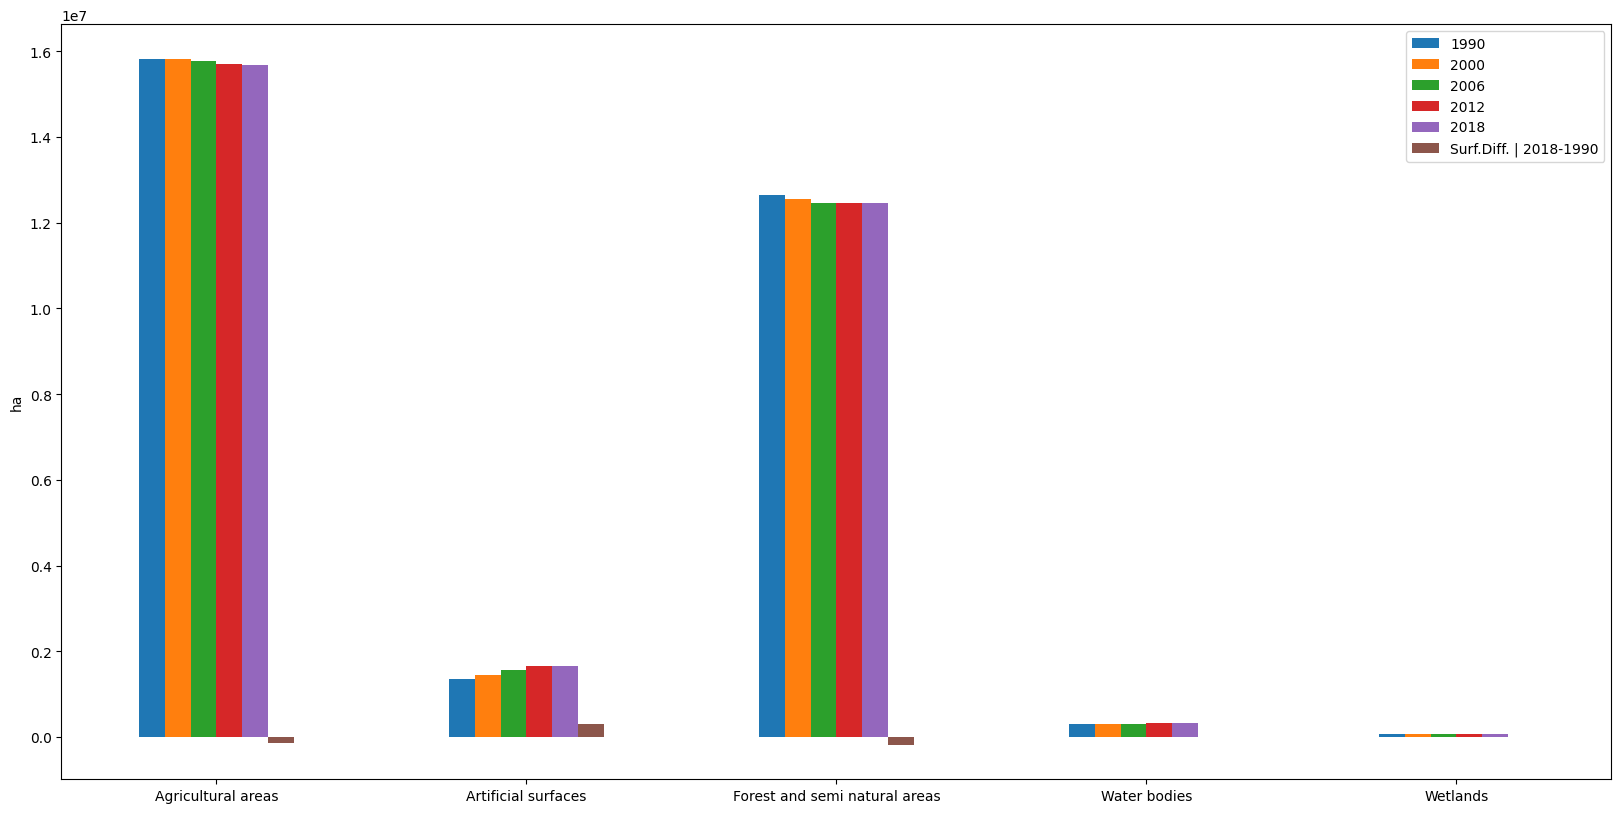

In [46]:
fig1_naz = plt.figure(figsize=(20, 10), dpi=100)
sub_fig_naz = GridSpec(nrows=1, ncols=1, figure=fig1_naz, hspace=0.35)
ax_naz = fig1_naz.add_subplot(sub_fig_naz[0, 0])
lvl1_naz_df.plot.bar(ax=ax_naz, rot=0)

ax_naz.yaxis.set_label_text('ha')
ax_naz.set_xlabel('')

plt.legend(loc='best')


In questo livello di CLC si nota una certa somiglianza con ciò che abbiamo visto per la Campania: aree artificiali in aumento, aree forestate ed agricole in regressione.

### 3.2.2 Grafici per il livello 2

In [47]:
lvl2_naz = [clc1990_label2, clc2000_label2, clc2006_label2, clc2012_label2, clc2018_label2]
lvl2_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['CORINE Land Cover - level 2'], how='outer'), lvl2_naz)
lvl2_naz_df.insert(loc=6, column='Surf.Diff. | 2000-1990', value=(lvl2_naz_df.surface_ha_2000 - lvl2_naz_df.surface_ha_1990))
lvl2_naz_df.insert(loc=7, column='Surf.Diff. | 2006-2000', value=(lvl2_naz_df.surface_ha_2006 - lvl2_naz_df.surface_ha_2000))
lvl2_naz_df.insert(loc=8, column='Surf.Diff. | 2012-2006', value=(lvl2_naz_df.surface_ha_2012 - lvl2_naz_df.surface_ha_2006))
lvl2_naz_df.insert(loc=9, column='Surf.Diff. | 2018-2012', value=(lvl2_naz_df.surface_ha_2018 - lvl2_naz_df.surface_ha_2012))
lvl2_naz_df.insert(loc=9, column='Surf.Diff. | 2018-1990', value=(lvl2_naz_df.surface_ha_2018 - lvl2_naz_df.surface_ha_1990))
lvl2_naz_df.fillna(0, inplace=True)
lvl2_naz_df.set_index('CORINE Land Cover - level 2', inplace=True)
lvl2_naz_df = lvl2_naz_df[['Surf.Diff. | 2000-1990', 'Surf.Diff. | 2006-2000', 'Surf.Diff. | 2012-2006', 'Surf.Diff. | 2018-2012', 'Surf.Diff. | 2018-1990']]
lvl2_naz_df

,Surf.Diff. | 2000-1990,Surf.Diff. | 2006-2000,Surf.Diff. | 2012-2006,Surf.Diff. | 2018-2012,Surf.Diff. | 2018-1990
CORINE Land Cover - level 2,,,,,
Arable land,55207.0658,-10271.7226,-90231.5817,-12360.8275,-57657.0660
"Artificial, non-agricultural vegetated areas",5554.0023,4316.9704,4861.1250,662.4738,15394.5715
Forests,42767.2886,86747.2016,-16412.5022,-6762.5701,106339.4179
Heterogeneous agricultural areas,3141.8711,-80525.4734,48412.0084,-629.6565,-29601.2504
"Industrial, commercial and transport units",34135.2946,44503.3245,38255.6049,6654.8030,123549.0270
Inland waters,683.7863,1188.3191,3352.2153,-24.4133,5199.9074
Inland wetlands,1132.9251,1989.9128,227.6485,252.6951,3603.1815
Marine waters,2286.6599,-1835.4393,4923.4371,-169.4592,5205.1985
Maritime wetlands,-2307.1754,2002.0212,-4442.4099,126.0221,-4621.5420


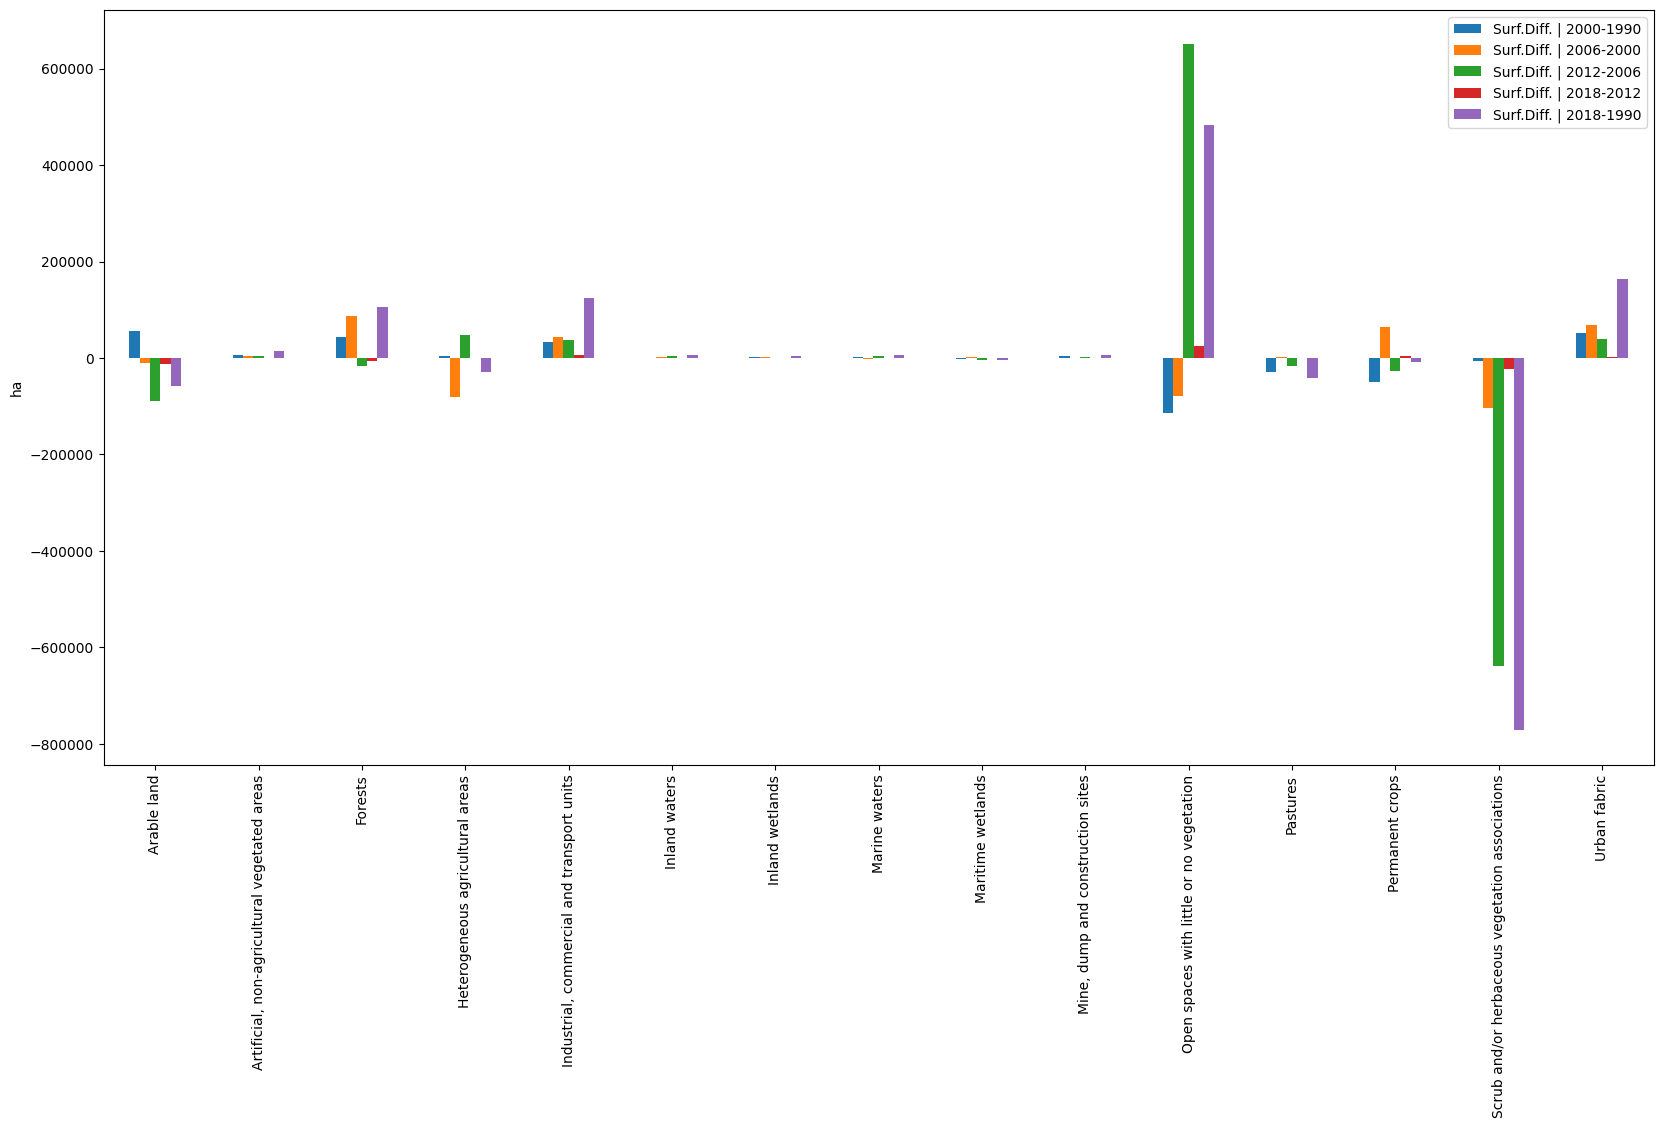

In [48]:
fig2_naz = plt.figure(figsize=(20, 10), dpi=100)
sub_fig_naz = GridSpec(nrows=1, ncols=1, figure=fig2_naz, hspace=0.35)
ax_naz = fig2_naz.add_subplot(sub_fig_naz[0, 0])
lvl2_naz_df.plot.bar(ax=ax_naz, rot=0)

ax_naz.yaxis.set_label_text('ha')
ax_naz.set_xlabel('')

plt.xticks(rotation = 90)
plt.legend(loc='best')

Anche qui c'è una certa somiglianza con ciò che accade in Campania.

### 3.2.3 Grafici per il livello 3

In [49]:
lvl3_naz = [clc1990_label3, clc2000_label3, clc2006_label3, clc2012_label3, clc2018_label3]
lvl3_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['CORINE Land Cover - level 3'], how='outer'), lvl3_naz)
lvl3_naz_df.insert(loc=6, column='Surf.Diff. | 2000-1990', value=(lvl3_naz_df.surface_ha_2000 - lvl3_naz_df.surface_ha_1990))
lvl3_naz_df.insert(loc=7, column='Surf.Diff. | 2006-2000', value=(lvl3_naz_df.surface_ha_2006 - lvl3_naz_df.surface_ha_2000))
lvl3_naz_df.insert(loc=8, column='Surf.Diff. | 2012-2006', value=(lvl3_naz_df.surface_ha_2012 - lvl3_naz_df.surface_ha_2006))
lvl3_naz_df.insert(loc=9, column='Surf.Diff. | 2018-2012', value=(lvl3_naz_df.surface_ha_2018 - lvl3_naz_df.surface_ha_2012))
lvl3_naz_df.insert(loc=9, column='Surf.Diff. | 2018-1990', value=(lvl3_naz_df.surface_ha_2018 - lvl3_naz_df.surface_ha_1990))
lvl3_naz_df.set_index('CORINE Land Cover - level 3', inplace=True)
lvl3_naz_df.fillna(0, inplace=True)
lvl3_naz_df

,surface_ha_1990,surface_ha_2000,surface_ha_2006,surface_ha_2012,surface_ha_2018,Surf.Diff. | 2000-1990,Surf.Diff. | 2006-2000,Surf.Diff. | 2012-2006,Surf.Diff. | 2018-1990,Surf.Diff. | 2018-2012
CORINE Land Cover - level 3,,,,,,,,,,
Agro-forestry areas,1.875953e+05,1.752959e+05,1.703568e+05,1.690878e+05,1.688554e+05,-12299.3238,-4939.1076,-1269.0034,-18739.8517,-232.4169
Airports,2.061481e+04,2.141885e+04,2.264239e+04,2.283700e+04,2.288896e+04,804.0433,1223.5421,194.6092,2274.1471,51.9525
Annual crops associated with permanent crops,3.948806e+05,3.827196e+05,2.056113e+05,2.313810e+05,2.311865e+05,-12160.9920,-177108.3339,25769.7259,-163694.1511,-194.5511
Bare rocks,4.823748e+05,4.475284e+05,4.351080e+05,4.347627e+05,4.348511e+05,-34846.4100,-12420.4185,-345.3238,-47523.7192,88.4331
"Beaches, dunes, sands",8.237502e+04,7.823843e+04,7.584526e+04,8.212965e+04,8.230547e+04,-4136.5882,-2393.1717,6284.3971,-69.5490,175.8138
Broad-leaved forest,5.477418e+06,5.490370e+06,5.558573e+06,5.681647e+06,5.674656e+06,12952.5900,68202.4264,123074.4047,197238.3262,-6991.0949
Burnt areas,3.688807e+03,7.726265e+03,3.048895e+03,1.040139e+04,2.990311e+04,4037.4575,-4677.3703,7352.4912,26214.3071,19501.7287
Coastal lagoons,9.441910e+04,9.670576e+04,9.487032e+04,9.993340e+04,9.976394e+04,2286.6592,-1835.4391,5063.0745,5344.8354,-169.4592
Complex cultivation patterns,2.208152e+06,2.171692e+06,2.202763e+06,2.204137e+06,2.198169e+06,-36460.6309,31070.7372,1374.0283,-9983.7268,-5967.8614


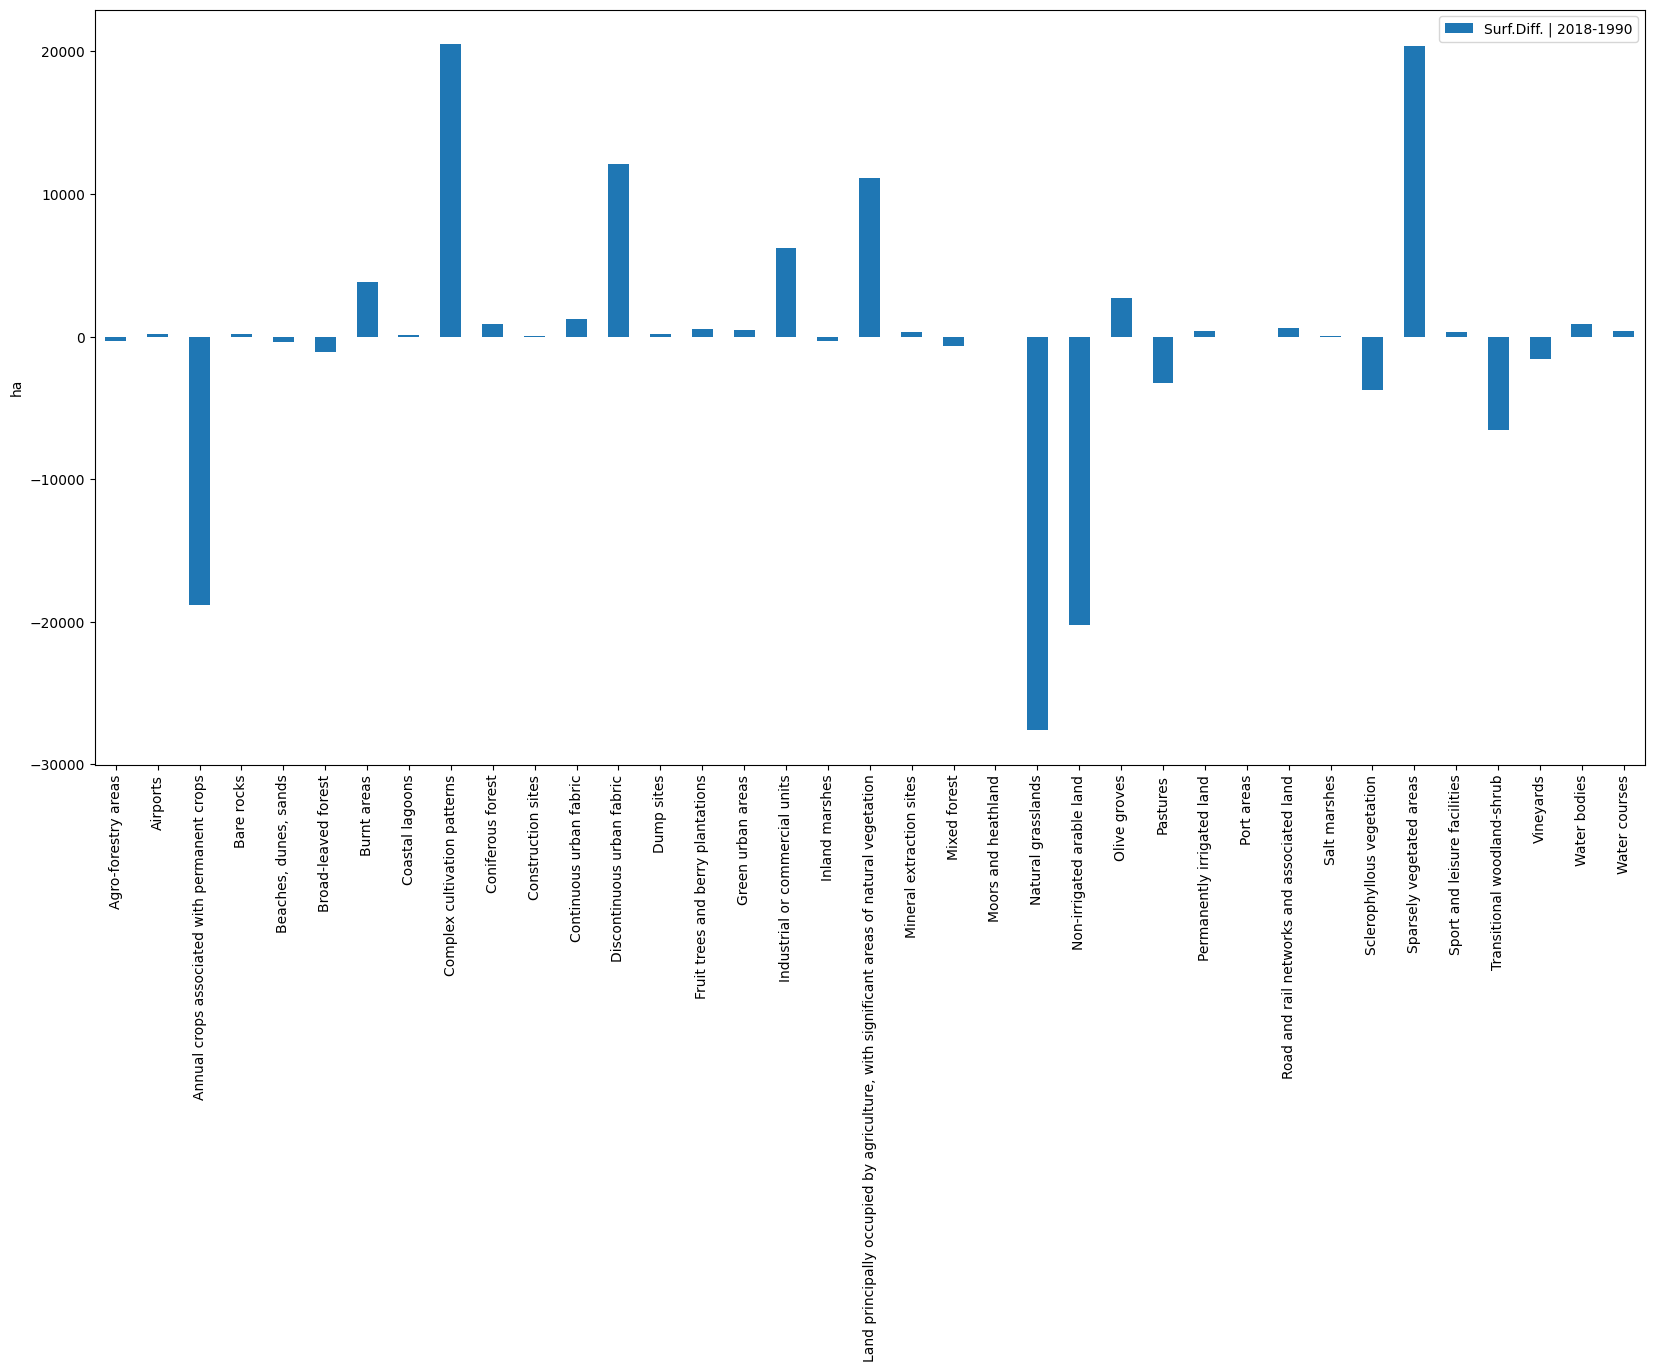

In [50]:
fig3_naz = plt.figure(figsize=(20, 10), dpi=100)
sub_fig_naz = GridSpec(nrows=1, ncols=1, figure=fig3_naz, hspace=0.35)
ax_naz = fig3_naz.add_subplot(sub_fig_naz[0, 0])
lvl3_df['Surf.Diff. | 2018-1990'].plot.bar(ax=ax_naz, rot=0)

ax_naz.yaxis.set_label_text('ha')
ax_naz.set_xlabel('')

plt.xticks(rotation = 90)
plt.legend(loc='best')

Purtroppo il *"trend campano"* è visibile anche qui. Il fatto è che ciò che accade a scala nazionale si ripete a scala regionale e scommetto anche provinciale in un po' tutto il territorio italiano.

## 3.3 Focus sui Comuni

In [51]:
# Dati 1990
focus_1990_naz = clc1990[['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3', 'surface_ha_1990']]
focus_1990_naz.set_index('label3', inplace=True)
focus_naz_1990_group = pd.DataFrame(focus_1990_naz.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3'])['surface_ha_1990'].sum())
focus_naz_1990_group.reset_index(inplace=True)

# Dati 2000
focus_2000_naz = clc2000[['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3', 'surface_ha_2000']]
focus_2000_naz.set_index('label3', inplace=True)
focus_naz_2000_group = pd.DataFrame(focus_2000_naz.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3'])['surface_ha_2000'].sum())
focus_naz_2000_group.reset_index(inplace=True)

# Dati 2006
focus_2006_naz = clc2006[['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3', 'surface_ha_2006']]
focus_2006_naz.set_index('label3', inplace=True)
focus_naz_2006_group = pd.DataFrame(focus_2006_naz.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3'])['surface_ha_2006'].sum())
focus_naz_2006_group.reset_index(inplace=True)

# Dati 2012
focus_2012_naz = clc2012[['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3', 'surface_ha_2012']]
focus_2012_naz.set_index('label3', inplace=True)
focus_naz_2012_group = pd.DataFrame(focus_2012_naz.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3'])['surface_ha_2012'].sum())
focus_naz_2012_group.reset_index(inplace=True)

# Dati 2018
focus_2018_naz = clc2018[['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3', 'surface_ha_2018']]
focus_2018_naz.set_index('label3', inplace=True)
focus_naz_2018_group = pd.DataFrame(focus_2018_naz.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha', 'label3'])['surface_ha_2018'].sum())
focus_naz_2018_group.reset_index(inplace=True)

In [52]:
focus_naz_2018_group

,pro_com,comune,provincia,regione,sup_com_ha,label3,surface_ha_2018
0,1001.0,Agliè,Torino,Piemonte,1314.622087,Broad-leaved forest,218.6224
1,1001.0,Agliè,Torino,Piemonte,1314.622087,Discontinuous urban fabric,64.7110
2,1001.0,Agliè,Torino,Piemonte,1314.622087,Green urban areas,51.8549
3,1001.0,Agliè,Torino,Piemonte,1314.622087,Industrial or commercial units,25.4731
4,1001.0,Agliè,Torino,Piemonte,1314.622087,"Land principally occupied by agriculture, with...",24.4334
...,...,...,...,...,...,...,...
64052,111107.0,Villaspeciosa,Sud Sardegna,Sardegna,2719.371313,Industrial or commercial units,25.7592
64053,111107.0,Villaspeciosa,Sud Sardegna,Sardegna,2719.371313,"Land principally occupied by agriculture, with...",216.6219
64054,111107.0,Villaspeciosa,Sud Sardegna,Sardegna,2719.371313,Non-irrigated arable land,1675.3119
64055,111107.0,Villaspeciosa,Sud Sardegna,Sardegna,2719.371313,Sclerophyllous vegetation,44.4901


### 3.3.1 Aree artificiali
I gruppi 1.1 ed 1.2 della CLC

In [53]:
# Dati 1990
artificial_surface_naz_1990 = focus_naz_1990_group[focus_naz_1990_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_naz_1990_group = pd.DataFrame(artificial_surface_naz_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
artificial_surface_naz_1990_group.reset_index(inplace=True)

# Dati 2000
artificial_surface_naz_2000 = focus_naz_2000_group[focus_naz_2000_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_naz_2000_group = pd.DataFrame(artificial_surface_naz_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
artificial_surface_naz_2000_group.reset_index(inplace=True)

# Dati 2006
artificial_surface_naz_2006 = focus_naz_2006_group[focus_naz_2006_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_naz_2006_group = pd.DataFrame(artificial_surface_naz_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
artificial_surface_naz_2006_group.reset_index(inplace=True)

# Dati 2012
artificial_surface_naz_2012 = focus_naz_2012_group[focus_naz_2012_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_naz_2012_group = pd.DataFrame(artificial_surface_naz_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
artificial_surface_naz_2012_group.reset_index(inplace=True)

# Dati 2018
artificial_surface_naz_2018 = focus_naz_2018_group[focus_naz_2018_group['label3'].isin(['Continuous urban fabric', 'Discontinuous urban fabric', 'Industrial or commercial units', 'Road and rail networks and associated land', 'Port areas', 'Airports'])]
artificial_surface_naz_2018_group = pd.DataFrame(artificial_surface_naz_2018.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha'])['surface_ha_2018'].sum())
artificial_surface_naz_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_artificial_naz = [artificial_surface_naz_2018_group, artificial_surface_naz_2012_group, artificial_surface_naz_2006_group, artificial_surface_naz_2000_group, artificial_surface_naz_1990_group]
focus_artificial_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_artificial_naz)
focus_artificial_naz_df = focus_artificial_naz_df[focus_artificial_naz_df['sup_com_ha'] > 0]
focus_artificial_naz_df.fillna(0, inplace=True)
focus_artificial_naz_df.insert(loc=5, column='perc_1990', value=round(focus_artificial_naz_df.surface_ha_1990 / focus_artificial_naz_df.sup_com_ha, 4) * 100)
focus_artificial_naz_df.insert(loc=6, column='perc_2000', value=round(focus_artificial_naz_df.surface_ha_2000 / focus_artificial_naz_df.sup_com_ha, 4) * 100)
focus_artificial_naz_df.insert(loc=7, column='perc_2006', value=round(focus_artificial_naz_df.surface_ha_2006 / focus_artificial_naz_df.sup_com_ha, 4) * 100)
focus_artificial_naz_df.insert(loc=8, column='perc_2012', value=round(focus_artificial_naz_df.surface_ha_2012 / focus_artificial_naz_df.sup_com_ha, 4) * 100)
focus_artificial_naz_df.insert(loc=9, column='perc_2018', value=round(focus_artificial_naz_df.surface_ha_2018 / focus_artificial_naz_df.sup_com_ha, 4) * 100)
focus_artificial_naz_df.insert(loc=10, column='Perc.Diff. | 2018-2000', value=(focus_artificial_naz_df.perc_2018 - focus_artificial_naz_df.perc_2000))
focus_artificial_naz_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
focus_artificial_naz_df

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
899,12023.0,Brunello,Varese,Lombardia,161.998833,60.01,60.01,44.49,44.49,44.49,-15.52,72.0654,72.0654,72.0655,97.2179,97.2181
4298,63036.0,Grumo Nevano,Napoli,Campania,287.688759,47.45,64.93,64.93,51.31,51.31,-13.62,147.6065,147.6065,186.8019,186.8019,136.5066
882,12006.0,Azzate,Varese,Lombardia,450.621469,46.75,46.75,38.01,38.01,38.01,-8.74,171.2779,171.2779,171.2779,210.6471,210.6469
953,12080.0,Gornate Olona,Varese,Lombardia,469.573308,31.05,31.05,22.32,22.32,22.32,-8.73,104.8177,104.8177,104.8177,145.8012,145.8012
4329,63067.0,San Giorgio a Cremano,Napoli,Campania,415.383936,60.96,76.57,68.51,68.51,68.51,-8.06,284.5767,284.5767,284.5768,318.0615,253.2174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,3114.0,Paruzzaro,Novara,Piemonte,522.716138,13.89,11.57,23.24,35.11,35.11,23.54,183.5155,183.5155,121.4790,60.5013,72.6050
5506,80097.0,San Ferdinando,Reggio di Calabria,Calabria,1419.798819,16.31,15.22,40.20,40.20,40.20,24.98,570.7536,570.7536,570.7535,216.1294,231.5077
257,2009.0,Balocco,Vercelli,Piemonte,1680.794846,10.41,0.00,2.97,28.22,28.22,28.22,474.3195,474.3195,49.8811,0.0000,175.0071
336,3043.0,Castelletto sopra Ticino,Novara,Piemonte,1464.109249,22.01,20.80,23.45,50.63,50.63,29.83,741.2521,741.2521,343.3539,304.5441,322.2282


In [54]:
# Superfici in arretramento
naz_reduction_artificial_area = focus_artificial_naz_df.iloc[0:10]
naz_reduction_artificial_area

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
899,12023.0,Brunello,Varese,Lombardia,161.998833,60.01,60.01,44.49,44.49,44.49,-15.52,72.0654,72.0654,72.0655,97.2179,97.2181
4298,63036.0,Grumo Nevano,Napoli,Campania,287.688759,47.45,64.93,64.93,51.31,51.31,-13.62,147.6065,147.6065,186.8019,186.8019,136.5066
882,12006.0,Azzate,Varese,Lombardia,450.621469,46.75,46.75,38.01,38.01,38.01,-8.74,171.2779,171.2779,171.2779,210.6471,210.6469
953,12080.0,Gornate Olona,Varese,Lombardia,469.573308,31.05,31.05,22.32,22.32,22.32,-8.73,104.8177,104.8177,104.8177,145.8012,145.8012
4329,63067.0,San Giorgio a Cremano,Napoli,Campania,415.383936,60.96,76.57,68.51,68.51,68.51,-8.06,284.5767,284.5767,284.5768,318.0615,253.2174
5710,83108.0,Torrenova,Messina,Sicilia,1292.677225,22.03,22.62,15.29,14.94,14.94,-7.68,193.1105,193.1105,197.6093,292.4331,284.7380
5708,83106.0,Terme Vigliatore,Messina,Sicilia,1322.797657,25.43,25.81,19.42,18.33,18.33,-7.48,242.5046,242.5046,256.9306,341.4543,336.4462
801,9049.0,Pietra Ligure,Savona,Liguria,987.811402,34.90,34.90,34.90,27.46,27.46,-7.44,271.2950,271.2950,344.7029,344.7031,344.7031
1049,13058.0,Castelmarte,Como,Lombardia,197.225522,47.17,47.17,39.83,39.83,39.83,-7.34,78.5500,78.5500,78.5500,93.0399,93.0399
4294,63032.0,Frattamaggiore,Napoli,Campania,538.816178,58.54,71.14,72.46,63.97,63.97,-7.17,344.6705,344.6705,390.4469,383.2980,315.4185


In [55]:
# Superfici in avanzamento
naz_increase_artificial_area = focus_artificial_naz_df.iloc[-10:]
naz_increase_artificial_area.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
naz_increase_artificial_area

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
4477,65011.0,Atrani,Salerno,Campania,12.061182,0.00,0.00,52.01,52.01,52.01,52.01,6.2730,6.2730,6.2730,0.0000,0.0000
336,3043.0,Castelletto sopra Ticino,Novara,Piemonte,1464.109249,22.01,20.80,23.45,50.63,50.63,29.83,741.2521,741.2521,343.3539,304.5441,322.2282
257,2009.0,Balocco,Vercelli,Piemonte,1680.794846,10.41,0.00,2.97,28.22,28.22,28.22,474.3195,474.3195,49.8811,0.0000,175.0071
5506,80097.0,San Ferdinando,Reggio di Calabria,Calabria,1419.798819,16.31,15.22,40.20,40.20,40.20,24.98,570.7536,570.7536,570.7535,216.1294,231.5077
372,3114.0,Paruzzaro,Novara,Piemonte,522.716138,13.89,11.57,23.24,35.11,35.11,23.54,183.5155,183.5155,121.4790,60.5013,72.6050
5705,83103.0,Valdina,Messina,Sicilia,260.160806,16.64,16.64,35.93,39.55,39.55,22.91,102.8957,102.8957,93.4653,43.3003,43.3026
371,3112.0,Orta San Giulio,Novara,Piemonte,664.998756,0.00,0.00,0.00,22.62,22.62,22.62,150.3928,150.3928,0.0000,0.0000,0.0000
4287,63025.0,Castello di Cisterna,Napoli,Campania,392.135970,21.89,46.04,68.31,68.31,68.31,22.27,267.8514,267.8514,267.8514,180.5292,85.8311
6271,96083.0,Zumaglia,Biella,Piemonte,261.365071,14.82,4.43,4.43,26.59,26.59,22.16,69.5047,69.5047,11.5807,11.5807,38.7374
3499,46013.0,Forte dei Marmi,Lucca,Toscana,918.715130,56.53,59.08,63.30,80.45,80.45,21.37,739.1208,739.1208,581.5429,542.7534,519.3559


### 3.3.2 Aree forestate
Il gruppo 3.1 della CLC

In [56]:
# Dati 1990
forest_surface_naz_1990 = focus_naz_1990_group[focus_naz_1990_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_naz_1990_group = pd.DataFrame(forest_surface_naz_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
forest_surface_naz_1990_group.reset_index(inplace=True)

# Dati 2000
forest_surface_naz_2000 = focus_naz_2000_group[focus_naz_2000_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_naz_2000_group = pd.DataFrame(forest_surface_naz_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
forest_surface_naz_2000_group.reset_index(inplace=True)

# Dati 2006
forest_surface_naz_2006 = focus_naz_2006_group[focus_naz_2006_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_naz_2006_group = pd.DataFrame(forest_surface_naz_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
forest_surface_naz_2006_group.reset_index(inplace=True)

# Dati 2012
forest_surface_naz_2012 = focus_naz_2012_group[focus_naz_2012_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_naz_2012_group = pd.DataFrame(forest_surface_naz_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
forest_surface_naz_2012_group.reset_index(inplace=True)

# Dati 2018
forest_surface_naz_2018 = focus_naz_2018_group[focus_naz_2018_group['label3'].isin(['Broad-leaved forest', 'Coniferous forest', 'Mixed forest'])]
forest_surface_naz_2018_group = pd.DataFrame(forest_surface_naz_2018.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha'])['surface_ha_2018'].sum())
forest_surface_naz_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_forest_naz = [forest_surface_naz_2018_group, forest_surface_naz_2012_group, forest_surface_naz_2006_group, forest_surface_naz_2000_group, forest_surface_naz_1990_group]
focus_forest_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_forest_naz)
focus_forest_naz_df = focus_forest_naz_df[focus_forest_naz_df['sup_com_ha'] > 0]
focus_forest_naz_df.fillna(0, inplace=True)
focus_forest_naz_df.insert(loc=5, column='perc_1990', value=round(focus_forest_naz_df.surface_ha_1990 / focus_forest_naz_df.sup_com_ha, 4) * 100)
focus_forest_naz_df.insert(loc=6, column='perc_2000', value=round(focus_forest_naz_df.surface_ha_2000 / focus_forest_naz_df.sup_com_ha, 4) * 100)
focus_forest_naz_df.insert(loc=7, column='perc_2006', value=round(focus_forest_naz_df.surface_ha_2006 / focus_forest_naz_df.sup_com_ha, 4) * 100)
focus_forest_naz_df.insert(loc=8, column='perc_2012', value=round(focus_forest_naz_df.surface_ha_2012 / focus_forest_naz_df.sup_com_ha, 4) * 100)
focus_forest_naz_df.insert(loc=9, column='perc_2018', value=round(focus_forest_naz_df.surface_ha_2018 / focus_forest_naz_df.sup_com_ha, 4) * 100)
focus_forest_naz_df.insert(loc=10, column='Perc.Diff. | 2018-2000', value=(focus_forest_naz_df.perc_2018 - focus_forest_naz_df.perc_2000))
focus_forest_naz_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
focus_forest_naz_df

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
4010,62073.0,Solopaca,Benevento,Campania,3112.664003,43.63,43.63,43.46,11.69,11.69,-31.94,363.9901,363.9901,1352.7210,1358.0359,1358.0275
2005,18162.0,Travacò Siccomario,Pavia,Lombardia,1704.486441,35.67,34.72,8.46,6.86,5.13,-29.59,87.4269,116.9231,144.1941,591.7315,607.9471
2066,20022.0,Dosolo,Mantova,Lombardia,2553.627074,36.66,33.26,15.80,28.04,5.45,-27.81,139.2560,716.0698,403.4684,849.4448,936.1148
5387,83054.0,Monforte San Giorgio,Messina,Sicilia,3225.987912,20.15,38.03,11.27,11.27,11.27,-26.76,363.6191,363.6191,363.6193,1226.7195,650.1504
4014,62077.0,Vitulano,Benevento,Campania,3599.050416,50.86,50.81,50.81,26.82,26.82,-23.99,965.1276,965.1276,1828.5273,1828.5272,1830.3353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,97078.0,Suello,Lecco,Lombardia,262.901636,3.74,3.74,30.07,30.07,30.07,26.33,79.0515,79.0515,79.0515,9.8363,9.8363
4727,71047.0,San Marco in Lamis,Foggia,Puglia,23419.726063,12.66,12.66,12.30,39.01,39.01,26.35,9136.7031,9136.7031,2879.7020,2965.3694,2965.3412
5343,83002.0,Alì,Messina,Sicilia,1593.861487,11.13,11.13,42.21,42.20,42.20,31.07,672.5921,672.5921,672.7852,177.3506,177.3474
4645,70041.0,Montagano,Campobasso,Molise,2662.359533,12.81,13.18,49.30,49.17,49.17,35.99,1309.1148,1309.1148,1312.6691,350.7878,341.0156


In [57]:
# Superfici in arretramento
naz_reduction_forest_area = focus_forest_naz_df.iloc[0:10]
naz_reduction_forest_area

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
4010,62073.0,Solopaca,Benevento,Campania,3112.664003,43.63,43.63,43.46,11.69,11.69,-31.94,363.9901,363.9901,1352.7210,1358.0359,1358.0275
2005,18162.0,Travacò Siccomario,Pavia,Lombardia,1704.486441,35.67,34.72,8.46,6.86,5.13,-29.59,87.4269,116.9231,144.1941,591.7315,607.9471
2066,20022.0,Dosolo,Mantova,Lombardia,2553.627074,36.66,33.26,15.80,28.04,5.45,-27.81,139.2560,716.0698,403.4684,849.4448,936.1148
5387,83054.0,Monforte San Giorgio,Messina,Sicilia,3225.987912,20.15,38.03,11.27,11.27,11.27,-26.76,363.6191,363.6191,363.6193,1226.7195,650.1504
4014,62077.0,Vitulano,Benevento,Campania,3599.050416,50.86,50.81,50.81,26.82,26.82,-23.99,965.1276,965.1276,1828.5273,1828.5272,1830.3353
1354,13059.0,Castelnuovo Bozzente,Como,Lombardia,362.195167,74.76,74.76,51.14,51.14,51.14,-23.62,185.2128,185.2128,185.2127,270.7783,270.7781
1975,18114.0,Pieve Porto Morone,Pavia,Lombardia,1639.626801,23.53,23.53,24.21,20.04,0.00,-23.53,0.0002,328.5814,396.9912,385.7940,385.7940
1788,17027.0,Braone,Brescia,Lombardia,1335.673792,61.74,61.74,61.69,39.25,39.25,-22.49,524.1978,524.1978,823.9188,824.5857,824.5859
5410,83080.0,San Pier Niceto,Messina,Sicilia,3667.976954,27.71,38.63,16.27,16.27,16.27,-22.36,596.7868,596.7868,596.7872,1416.8175,1016.4019
1321,13009.0,Anzano del Parco,Como,Lombardia,324.503555,29.46,29.46,7.69,7.69,7.69,-21.77,24.9485,24.9485,24.9485,95.6024,95.6025


In [58]:
# Superfici in avanzamento
naz_increase_forest_area = focus_forest_naz_df.iloc[-10:]
naz_increase_forest_area.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
naz_increase_forest_area

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
5378,83042.0,Longi,Messina,Sicilia,4210.989035,31.58,31.58,65.31,68.51,68.51,36.93,2885.0294,2885.0294,2750.1191,1329.8307,1329.8237
4645,70041.0,Montagano,Campobasso,Molise,2662.359533,12.81,13.18,49.30,49.17,49.17,35.99,1309.1148,1309.1148,1312.6691,350.7878,341.0156
5343,83002.0,Alì,Messina,Sicilia,1593.861487,11.13,11.13,42.21,42.20,42.20,31.07,672.5921,672.5921,672.7852,177.3506,177.3474
4727,71047.0,San Marco in Lamis,Foggia,Puglia,23419.726063,12.66,12.66,12.30,39.01,39.01,26.35,9136.7031,9136.7031,2879.7020,2965.3694,2965.3412
6035,97078.0,Suello,Lecco,Lombardia,262.901636,3.74,3.74,30.07,30.07,30.07,26.33,79.0515,79.0515,79.0515,9.8363,9.8363
5383,83050.0,Militello Rosmarino,Messina,Sicilia,2953.560321,30.59,30.80,55.18,56.89,56.89,26.09,1680.4067,1680.4067,1629.8563,909.6290,903.4505
1946,18071.0,Gerenzago,Pavia,Lombardia,541.125193,0.00,0.00,25.77,25.77,25.77,25.77,139.4217,139.4217,139.4217,0.0000,0.0000
5606,90044.0,Nughedu San Nicolò,Sassari,Sardegna,6789.378997,14.32,15.66,39.48,40.42,40.42,24.76,2744.1430,2744.1430,2680.5068,1062.9248,972.5207
5390,83057.0,Montalbano Elicona,Messina,Sicilia,6780.082531,52.78,30.74,53.69,53.50,55.09,24.35,3734.9590,3627.4330,3639.9593,2084.5071,3578.2554
5391,83058.0,Motta Camastra,Messina,Sicilia,2530.898840,36.11,36.11,54.05,59.70,59.70,23.59,1510.8548,1510.8548,1367.8344,913.8916,913.8926


### 3.3.3 Aree agricole
Il gruppo 2.1 della CLC

In [59]:
# Dati 1990
arable_lands_surface_naz_1990 = focus_naz_1990_group[focus_naz_1990_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_naz_1990_group = pd.DataFrame(arable_lands_surface_naz_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
arable_lands_surface_naz_1990_group.reset_index(inplace=True)

# Dati 2000
arable_lands_surface_naz_2000 = focus_naz_2000_group[focus_naz_2000_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_naz_2000_group = pd.DataFrame(arable_lands_surface_naz_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
arable_lands_surface_naz_2000_group.reset_index(inplace=True)

# Dati 2006
arable_lands_surface_naz_2006 = focus_naz_2006_group[focus_naz_2006_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_naz_2006_group = pd.DataFrame(arable_lands_surface_naz_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
arable_lands_surface_naz_2006_group.reset_index(inplace=True)

# Dati 2012
arable_lands_surface_naz_2012 = focus_naz_2012_group[focus_naz_2012_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_naz_2012_group = pd.DataFrame(arable_lands_surface_naz_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
arable_lands_surface_naz_2012_group.reset_index(inplace=True)

# Dati 2018
arable_lands_surface_naz_2018 = focus_naz_2018_group[focus_naz_2018_group['label3'].isin(['Non-irrigated arable land', 'Permanently irrigated land'])]
arable_lands_surface_naz_2018_group = pd.DataFrame(arable_lands_surface_naz_2018.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha'])['surface_ha_2018'].sum())
arable_lands_surface_naz_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_arable_lands_naz = [arable_lands_surface_naz_2018_group, arable_lands_surface_naz_2012_group, arable_lands_surface_naz_2006_group, arable_lands_surface_naz_2000_group, arable_lands_surface_naz_1990_group]
focus_arable_lands_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_arable_lands_naz)
focus_arable_lands_naz_df = focus_arable_lands_naz_df[focus_arable_lands_naz_df['sup_com_ha'] > 0]
focus_arable_lands_naz_df.fillna(0, inplace=True)
focus_arable_lands_naz_df.insert(loc=5, column='perc_1990', value=round(focus_arable_lands_naz_df.surface_ha_1990 / focus_arable_lands_naz_df.sup_com_ha, 4) * 100)
focus_arable_lands_naz_df.insert(loc=6, column='perc_2000', value=round(focus_arable_lands_naz_df.surface_ha_2000 / focus_arable_lands_naz_df.sup_com_ha, 4) * 100)
focus_arable_lands_naz_df.insert(loc=7, column='perc_2006', value=round(focus_arable_lands_naz_df.surface_ha_2006 / focus_arable_lands_naz_df.sup_com_ha, 4) * 100)
focus_arable_lands_naz_df.insert(loc=8, column='perc_2012', value=round(focus_arable_lands_naz_df.surface_ha_2012 / focus_arable_lands_naz_df.sup_com_ha, 4) * 100)
focus_arable_lands_naz_df.insert(loc=9, column='perc_2018', value=round(focus_arable_lands_naz_df.surface_ha_2018 / focus_arable_lands_naz_df.sup_com_ha, 4) * 100)
focus_arable_lands_naz_df.insert(loc=10, column='Perc.Diff. | 2018-2000', value=(focus_arable_lands_naz_df.perc_2018 - focus_arable_lands_naz_df.perc_2000))
focus_arable_lands_naz_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=True, inplace=True)
focus_arable_lands_naz_df

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
1903,28080.0,Santa Giustina in Colle,Padova,Veneto,1796.754897,89.86,92.50,91.92,12.83,12.83,-79.67,230.5114,230.5115,1651.6402,1661.9126,1614.5434
1861,28036.0,Curtarolo,Padova,Veneto,1472.896746,89.61,84.87,83.69,9.24,9.24,-75.63,136.0505,136.0505,1232.6876,1250.0597,1319.9213
1626,24026.0,Cassola,Vicenza,Veneto,1273.950878,70.93,69.20,66.58,11.82,11.13,-58.07,141.8257,150.5180,848.1867,881.6361,903.5994
3451,64072.0,Pietradefusi,Avellino,Campania,924.149874,77.90,77.90,20.16,20.16,20.16,-57.74,186.3344,186.3344,186.3345,719.9375,719.9308
3442,64056.0,Montefusco,Avellino,Campania,823.823558,59.13,59.13,2.01,2.01,2.01,-57.12,16.5238,16.5238,16.5238,487.1327,487.1269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3880,70046.0,Montenero di Bisaccia,Campobasso,Molise,9331.252115,27.05,26.67,70.13,70.13,70.13,43.46,6544.4633,6544.4633,6544.4634,2488.5836,2524.0691
3230,61020.0,Casaluce,Caserta,Campania,955.842829,0.70,0.70,0.70,60.53,60.53,59.83,578.6141,578.6141,6.7225,6.7226,6.7222
3903,70069.0,San Martino in Pensilis,Campobasso,Molise,10065.202788,23.10,23.10,83.46,83.46,83.46,60.36,8400.8974,8400.8974,8400.8973,2324.9437,2324.9034
3245,61037.0,Frignano,Caserta,Campania,985.795577,0.00,0.00,0.00,69.03,69.03,69.03,680.5149,680.5149,0.0000,0.0000,0.0000


In [60]:
# Superfici in arretramento
naz_reduction_arable_lands_area = focus_arable_lands_naz_df.iloc[0:10]
naz_reduction_arable_lands_area

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
1903,28080.0,Santa Giustina in Colle,Padova,Veneto,1796.754897,89.86,92.50,91.92,12.83,12.83,-79.67,230.5114,230.5115,1651.6402,1661.9126,1614.5434
1861,28036.0,Curtarolo,Padova,Veneto,1472.896746,89.61,84.87,83.69,9.24,9.24,-75.63,136.0505,136.0505,1232.6876,1250.0597,1319.9213
1626,24026.0,Cassola,Vicenza,Veneto,1273.950878,70.93,69.20,66.58,11.82,11.13,-58.07,141.8257,150.5180,848.1867,881.6361,903.5994
3451,64072.0,Pietradefusi,Avellino,Campania,924.149874,77.90,77.90,20.16,20.16,20.16,-57.74,186.3344,186.3344,186.3345,719.9375,719.9308
3442,64056.0,Montefusco,Avellino,Campania,823.823558,59.13,59.13,2.01,2.01,2.01,-57.12,16.5238,16.5238,16.5238,487.1327,487.1269
1923,28101.0,Villa del Conte,Padova,Veneto,1734.840442,96.57,96.39,92.42,39.87,39.87,-56.52,691.7159,691.7159,1603.3313,1672.1357,1675.4122
2545,44036.0,Montefiore dell'Aso,Ascoli Piceno,Marche,2820.740109,31.58,52.36,51.94,1.96,1.96,-50.40,55.4167,55.4167,1465.2004,1477.0519,890.6685
1847,28020.0,Campo San Martino,Padova,Veneto,1315.986365,89.89,89.56,87.50,39.25,39.25,-50.31,516.4652,516.4652,1151.4484,1178.6033,1182.9783
4097,75041.0,Martignano,Lecce,Puglia,649.212863,55.63,55.62,7.23,7.23,7.23,-48.39,46.9307,46.9307,46.9307,361.0667,361.1841
4147,75094.0,Zollino,Lecce,Puglia,995.447907,73.07,73.07,25.56,25.56,25.56,-47.51,254.4702,254.4702,254.4701,727.3750,727.3907


In [61]:
# Superfici in avanzamento
naz_increase_arable_lands_area = focus_arable_lands_naz_df.iloc[-10:]
naz_increase_arable_lands_area.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
naz_increase_arable_lands_area

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
3297,61098.0,Villa di Briano,Caserta,Campania,854.692612,3.91,3.91,3.91,74.03,74.03,70.12,632.7436,632.7436,33.4422,33.4424,33.4453
3245,61037.0,Frignano,Caserta,Campania,985.795577,0.00,0.00,0.00,69.03,69.03,69.03,680.5149,680.5149,0.0000,0.0000,0.0000
3903,70069.0,San Martino in Pensilis,Campobasso,Molise,10065.202788,23.10,23.10,83.46,83.46,83.46,60.36,8400.8974,8400.8974,8400.8973,2324.9437,2324.9034
3230,61020.0,Casaluce,Caserta,Campania,955.842829,0.70,0.70,0.70,60.53,60.53,59.83,578.6141,578.6141,6.7225,6.7226,6.7222
3880,70046.0,Montenero di Bisaccia,Campobasso,Molise,9331.252115,27.05,26.67,70.13,70.13,70.13,43.46,6544.4633,6544.4633,6544.4634,2488.5836,2524.0691
3912,70078.0,Termoli,Campobasso,Molise,5563.450730,16.95,16.76,57.90,59.83,59.83,43.07,3328.3420,3328.3420,3221.2335,932.5081,942.8076
5205,97072.0,Rogeno,Lecco,Lombardia,482.482168,0.70,0.70,42.34,42.34,42.34,41.64,204.2863,204.2863,204.2863,3.3881,3.3881
4668,83090.0,San Teodoro,Messina,Sicilia,1397.402292,29.16,29.16,67.97,67.97,67.97,38.81,949.7711,949.7711,949.7711,407.4871,407.4882
3889,70055.0,Portocannone,Campobasso,Molise,1311.357120,19.86,19.86,57.15,57.15,57.15,37.29,749.4987,749.4987,749.4987,260.4368,260.4467
3931,71014.0,Casalvecchio di Puglia,Foggia,Puglia,3193.205814,45.71,48.78,48.78,84.11,84.11,35.33,2685.9620,2685.9620,1557.6443,1557.6441,1459.5313


### 3.3.4 Aree bruciate

In [62]:
# Dati 1990
burnt_surface_naz_1990 = focus_naz_1990_group[focus_naz_1990_group['label3'].isin(['Burnt areas'])]
burnt_surface_naz_1990_group = pd.DataFrame(burnt_surface_naz_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
burnt_surface_naz_1990_group.reset_index(inplace=True)

# Dati 2000
burnt_surface_naz_2000 = focus_naz_2000_group[focus_naz_2000_group['label3'].isin(['Burnt areas'])]
burnt_surface_naz_2000_group = pd.DataFrame(burnt_surface_naz_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
burnt_surface_naz_2000_group.reset_index(inplace=True)

# Dati 2006
burnt_surface_naz_2006 = focus_naz_2006_group[focus_naz_2006_group['label3'].isin(['Burnt areas'])]
burnt_surface_naz_2006_group = pd.DataFrame(burnt_surface_naz_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
burnt_surface_naz_2006_group.reset_index(inplace=True)

# Dati 2012
burnt_surface_naz_2012 = focus_naz_2012_group[focus_naz_2012_group['label3'].isin(['Burnt areas'])]
burnt_surface_naz_2012_group = pd.DataFrame(burnt_surface_naz_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
burnt_surface_naz_2012_group.reset_index(inplace=True)

# Dati 2018
burnt_surface_naz_2018 = focus_naz_2018_group[focus_naz_2018_group['label3'].isin(['Burnt areas'])]
burnt_surface_naz_2018_group = pd.DataFrame(burnt_surface_naz_2018.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha'])['surface_ha_2018'].sum())
burnt_surface_naz_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_burnt_naz = [burnt_surface_naz_2018_group, burnt_surface_naz_2012_group, burnt_surface_naz_2006_group, burnt_surface_naz_2000_group, burnt_surface_naz_1990_group]
focus_burnt_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_burnt_naz)
focus_burnt_naz_df = focus_burnt_naz_df[focus_burnt_naz_df['sup_com_ha'] > 0]
focus_burnt_naz_df.fillna(0, inplace=True)
focus_burnt_naz_df.insert(loc=5, column='perc_1990', value=round(focus_burnt_naz_df.surface_ha_1990 / focus_burnt_naz_df.sup_com_ha, 4) * 100)
focus_burnt_naz_df.insert(loc=6, column='perc_2000', value=round(focus_burnt_naz_df.surface_ha_2000 / focus_burnt_naz_df.sup_com_ha, 4) * 100)
focus_burnt_naz_df.insert(loc=7, column='perc_2006', value=round(focus_burnt_naz_df.surface_ha_2006 / focus_burnt_naz_df.sup_com_ha, 4) * 100)
focus_burnt_naz_df.insert(loc=8, column='perc_2012', value=round(focus_burnt_naz_df.surface_ha_2012 / focus_burnt_naz_df.sup_com_ha, 4) * 100)
focus_burnt_naz_df.insert(loc=9, column='perc_2018', value=round(focus_burnt_naz_df.surface_ha_2018 / focus_burnt_naz_df.sup_com_ha, 4) * 100)
focus_burnt_naz_df.insert(loc=10, column='Perc.Diff. | 2018-2000', value=(focus_burnt_naz_df.perc_2018 - focus_burnt_naz_df.perc_2000))
focus_burnt_naz_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
focus_burnt_naz_df

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
114,81020.0,San Vito Lo Capo,Trapani,Sicilia,6011.867192,0.00,0.00,0.0,0.00,42.65,42.65,2564.0387,0.0000,0.0,0.0000,0.0000
141,83063.0,Oliveri,Messina,Sicilia,1043.475159,0.00,0.00,0.0,0.00,36.58,36.58,381.7231,0.0000,0.0,0.0000,0.0000
49,63082.0,Terzigno,Napoli,Campania,2346.480829,0.00,0.00,0.0,0.00,18.50,18.50,434.1155,0.0000,0.0,0.0000,0.0000
45,63064.0,Ercolano,Napoli,Campania,1989.359843,0.00,0.00,0.0,8.49,17.54,17.54,348.9169,168.9727,0.0,0.0000,0.0000
223,111046.0,Nurallao,Sud Sardegna,Sardegna,3476.167353,0.00,0.00,0.0,0.00,17.40,17.40,604.7035,0.0000,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,83061.0,Nizza di Sicilia,Messina,Sicilia,1341.538156,0.00,1.97,0.0,0.00,0.02,-1.95,0.3277,0.0000,0.0,26.3822,0.0000
203,100003.0,Montemurlo,Prato,Toscana,3077.584750,0.00,3.78,0.0,1.64,1.64,-2.14,50.4463,50.4463,0.0,116.4644,0.0000
66,65052.0,Fisciano,Salerno,Campania,3168.742849,0.00,4.15,0.0,0.00,1.43,-2.72,45.1761,0.0000,0.0,131.4723,0.0000
4,10059.0,Sestri Levante,Genova,Liguria,3361.625421,12.95,9.23,0.0,0.00,3.04,-6.19,102.1619,0.0000,0.0,310.3360,435.4819


### 3.3.5 Aree adibite a discarica

In [63]:
# Dati 1990
dump_surface_naz_1990 = focus_naz_1990_group[focus_naz_1990_group['label3'].isin(['Dump sites'])]
dump_surface_naz_1990_group = pd.DataFrame(dump_surface_naz_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
dump_surface_naz_1990_group.reset_index(inplace=True)

# Dati 2000
dump_surface_naz_2000 = focus_naz_2000_group[focus_naz_2000_group['label3'].isin(['Dump sites'])]
dump_surface_naz_2000_group = pd.DataFrame(dump_surface_naz_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
dump_surface_naz_2000_group.reset_index(inplace=True)

# Dati 2006
dump_surface_naz_2006 = focus_naz_2006_group[focus_naz_2006_group['label3'].isin(['Dump sites'])]
dump_surface_naz_2006_group = pd.DataFrame(dump_surface_naz_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
dump_surface_naz_2006_group.reset_index(inplace=True)

# Dati 2012
dump_surface_naz_2012 = focus_naz_2012_group[focus_naz_2012_group['label3'].isin(['Dump sites'])]
dump_surface_naz_2012_group = pd.DataFrame(dump_surface_naz_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
dump_surface_naz_2012_group.reset_index(inplace=True)

# Dati 2018
dump_surface_naz_2018 = focus_naz_2018_group[focus_naz_2018_group['label3'].isin(['Dump sites'])]
dump_surface_naz_2018_group = pd.DataFrame(dump_surface_naz_2018.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha'])['surface_ha_2018'].sum())
dump_surface_naz_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_dump_naz = [dump_surface_naz_2018_group, dump_surface_naz_2012_group, dump_surface_naz_2006_group, dump_surface_naz_2000_group, dump_surface_naz_1990_group]
focus_dump_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_dump_naz)
focus_dump_naz_df = focus_dump_naz_df[focus_dump_naz_df['sup_com_ha'] > 0]
focus_dump_naz_df.fillna(0, inplace=True)
focus_dump_naz_df.insert(loc=5, column='perc_1990', value=round(focus_dump_naz_df.surface_ha_1990 / focus_dump_naz_df.sup_com_ha, 4) * 100)
focus_dump_naz_df.insert(loc=6, column='perc_2000', value=round(focus_dump_naz_df.surface_ha_2000 / focus_dump_naz_df.sup_com_ha, 4) * 100)
focus_dump_naz_df.insert(loc=7, column='perc_2006', value=round(focus_dump_naz_df.surface_ha_2006 / focus_dump_naz_df.sup_com_ha, 4) * 100)
focus_dump_naz_df.insert(loc=8, column='perc_2012', value=round(focus_dump_naz_df.surface_ha_2012 / focus_dump_naz_df.sup_com_ha, 4) * 100)
focus_dump_naz_df.insert(loc=9, column='perc_2018', value=round(focus_dump_naz_df.surface_ha_2018 / focus_dump_naz_df.sup_com_ha, 4) * 100)
focus_dump_naz_df.insert(loc=10, column='Perc.Diff. | 2018-2000', value=(focus_dump_naz_df.perc_2018 - focus_dump_naz_df.perc_2000))
focus_dump_naz_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
focus_dump_naz_df

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
2,1273.0,Torrazza Piemonte,Torino,Piemonte,982.382979,0.0,0.00,0.00,6.72,7.64,7.64,75.0599,66.0309,0.0000,0.0000,0.0000
13,20034.0,Medole,Mantova,Lombardia,2572.857637,0.0,0.00,0.00,6.66,6.66,6.66,171.3837,171.3837,0.0000,0.0000,0.0000
82,87030.0,Motta Sant'Anastasia,Catania,Sicilia,3569.989125,0.0,0.00,1.62,2.16,2.16,2.16,77.0713,77.0713,57.8396,0.0000,0.0000
25,34041.0,Torrile,Parma,Emilia-Romagna,3714.699293,0.0,0.00,0.00,2.10,2.10,2.10,77.8524,77.8524,0.0000,0.0000,0.0000
52,57027.0,Fara in Sabina,Rieti,Lazio,5496.235909,0.0,0.00,0.00,1.98,1.98,1.98,108.5511,108.5511,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,26010.0,Casier,Treviso,Veneto,1342.173767,0.0,1.25,1.25,1.25,1.25,0.00,16.8000,16.8000,16.8000,16.8000,0.0000
35,37032.0,Imola,Bologna,Emilia-Romagna,20502.134650,0.0,0.18,0.18,0.18,0.18,0.00,37.1468,37.1468,37.1468,37.1468,0.0000
36,38006.0,Comacchio,Ferrara,Emilia-Romagna,28374.611068,0.1,0.10,0.10,0.10,0.10,0.00,28.5891,28.5891,28.5891,28.5898,28.5892
20,27042.0,Venezia,Venezia,Veneto,41589.266300,0.0,0.09,0.09,0.09,0.09,0.00,36.2536,36.2536,36.2536,36.2536,0.0000


In [64]:
# Dati 1990
green_urban_surface_surface_naz_1990 = focus_naz_1990_group[focus_naz_1990_group['label3'].isin(['Green urban areas'])]
green_urban_surface_surface_naz_1990_group = pd.DataFrame(green_urban_surface_surface_naz_1990.groupby(['pro_com'])['surface_ha_1990'].sum())
green_urban_surface_surface_naz_1990_group.reset_index(inplace=True)

# Dati 2000
green_urban_surface_surface_naz_2000 = focus_naz_2000_group[focus_naz_2000_group['label3'].isin(['Green urban areas'])]
green_urban_surface_surface_naz_2000_group = pd.DataFrame(green_urban_surface_surface_naz_2000.groupby(['pro_com'])['surface_ha_2000'].sum())
green_urban_surface_surface_naz_2000_group.reset_index(inplace=True)

# Dati 2006
green_urban_surface_surface_naz_2006 = focus_naz_2006_group[focus_naz_2006_group['label3'].isin(['Green urban areas'])]
green_urban_surface_surface_naz_2006_group = pd.DataFrame(green_urban_surface_surface_naz_2006.groupby(['pro_com'])['surface_ha_2006'].sum())
green_urban_surface_surface_naz_2006_group.reset_index(inplace=True)

# Dati 2012
green_urban_surface_surface_naz_2012 = focus_naz_2012_group[focus_naz_2012_group['label3'].isin(['Green urban areas'])]
green_urban_surface_surface_naz_2012_group = pd.DataFrame(green_urban_surface_surface_naz_2012.groupby(['pro_com'])['surface_ha_2012'].sum())
green_urban_surface_surface_naz_2012_group.reset_index(inplace=True)

# Dati 2018
green_urban_surface_surface_naz_2018 = focus_naz_2018_group[focus_naz_2018_group['label3'].isin(['Green urban areas'])]
green_urban_surface_surface_naz_2018_group = pd.DataFrame(green_urban_surface_surface_naz_2018.groupby(['pro_com', 'comune', 'provincia', 'regione', 'sup_com_ha'])['surface_ha_2018'].sum())
green_urban_surface_surface_naz_2018_group.reset_index(inplace=True)

# Dati aggregati
focus_green_urban_surface_naz = [green_urban_surface_surface_naz_2018_group, green_urban_surface_surface_naz_2012_group, green_urban_surface_surface_naz_2006_group, green_urban_surface_surface_naz_2000_group, green_urban_surface_surface_naz_1990_group]
focus_green_urban_surface_naz_df = reduce(lambda  left,right: pd.merge(left,right,on=['pro_com'], how='outer'), focus_green_urban_surface_naz)
focus_green_urban_surface_naz_df = focus_green_urban_surface_naz_df[focus_green_urban_surface_naz_df['sup_com_ha'] > 0]
focus_green_urban_surface_naz_df.fillna(0, inplace=True)
focus_green_urban_surface_naz_df.insert(loc=5, column='perc_1990', value=round(focus_green_urban_surface_naz_df.surface_ha_1990 / focus_green_urban_surface_naz_df.sup_com_ha, 4) * 100)
focus_green_urban_surface_naz_df.insert(loc=6, column='perc_2000', value=round(focus_green_urban_surface_naz_df.surface_ha_2000 / focus_green_urban_surface_naz_df.sup_com_ha, 4) * 100)
focus_green_urban_surface_naz_df.insert(loc=7, column='perc_2006', value=round(focus_green_urban_surface_naz_df.surface_ha_2006 / focus_green_urban_surface_naz_df.sup_com_ha, 4) * 100)
focus_green_urban_surface_naz_df.insert(loc=8, column='perc_2012', value=round(focus_green_urban_surface_naz_df.surface_ha_2012 / focus_green_urban_surface_naz_df.sup_com_ha, 4) * 100)
focus_green_urban_surface_naz_df.insert(loc=9, column='perc_2018', value=round(focus_green_urban_surface_naz_df.surface_ha_2018 / focus_green_urban_surface_naz_df.sup_com_ha, 4) * 100)
focus_green_urban_surface_naz_df.insert(loc=10, column='Perc.Diff. | 2018-2000', value=(focus_green_urban_surface_naz_df.perc_2018 - focus_green_urban_surface_naz_df.perc_2000))
focus_green_urban_surface_naz_df.sort_values(by=['Perc.Diff. | 2018-2000'], ascending=False, inplace=True)
focus_green_urban_surface_naz_df

,pro_com,comune,provincia,regione,sup_com_ha,perc_1990,perc_2000,perc_2006,perc_2012,perc_2018,Perc.Diff. | 2018-2000,surface_ha_2018,surface_ha_2012,surface_ha_2006,surface_ha_2000,surface_ha_1990
19,15032.0,Bresso,Milano,Lombardia,338.236565,0.00,0.00,10.09,19.93,19.93,19.93,67.4045,67.4045,34.1411,0.0000,0.0000
127,108046.0,Vedano al Lambro,Monza e della Brianza,Lombardia,197.928997,0.00,0.00,19.70,19.70,19.70,19.70,38.9824,38.9824,38.9825,0.0000,0.0000
125,108033.0,Monza,Monza e della Brianza,Lombardia,3308.665453,1.07,1.07,13.58,13.58,13.58,12.51,449.4274,449.4274,449.4274,35.4254,35.4254
95,62062.0,San Lorenzo Maggiore,Benevento,Campania,1629.550368,0.00,0.00,0.00,0.00,11.89,11.89,193.6792,0.0000,0.0000,0.0000,0.0000
20,15077.0,Cinisello Balsamo,Milano,Lombardia,1272.408112,0.00,0.00,0.00,9.68,9.68,9.68,123.1662,123.1662,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,1090.0,Collegno,Torino,Piemonte,1809.931733,3.36,3.22,3.48,2.76,2.76,-0.46,50.0311,50.0311,62.9144,58.3309,60.8457
50,30027.0,Codroipo,Udine,Friuli Venezia Giulia,7520.098015,1.09,1.09,0.40,0.40,0.40,-0.69,30.4123,30.4123,30.4123,81.8193,81.8197
126,108040.0,Seveso,Monza e della Brianza,Lombardia,740.240733,0.00,8.95,8.23,8.23,8.23,-0.72,60.8857,60.8857,60.8857,66.2372,0.0000
82,48017.0,Firenze,Firenze,Toscana,10231.561540,3.25,3.09,2.44,2.14,2.14,-0.95,218.9329,218.9329,249.9431,315.8389,332.8009


# Conclusione

Sembra abbastanza chiaro che in Italia negli ultimi trenta anni circa si sia preferito sacrificare il paesaggio agricolo e forestale in favore di quello urbano. Si parla molto di [Urban Heat Island](https://www.epa.gov/green-infrastructure/reduce-urban-heat-island-effect#:~:text=%22Urban%20heat%20islands%22%20occur%20when,heat%2Drelated%20illness%20and%20mortality.) e della [riduzione di questi fenomeni](https://www.sciencedirect.com/science/article/pii/S2210670721008301) tipici delle aree urbane. Magari, se si fosse riammodernato il costruito negli ultimi trenta anni al posto di edificare in nuovi luoghi, il fenomeno delle isole urbane di calore ci avrebbe colpito in maniera molto minore di quanto non ci colpisca adesso(e nei prossimi anni!). Avremmo così preservato il nostro patrimonio boschivo ed agricolo rendendo il *Bel Paese* ancora più bello.

Hai commenti, indicazioni o soluzioni alternative in Python? Scrivi nella sezione [Discussioni](https://github.com/MaxDragonheart/PyGIS-Blog/discussions/24).

## Newsletter

Se vuoi ricevere aggiornamenti sui prossimi articoli [iscriviti alla newsletter](https://massimilianomoraca.it/newsletter/)!

## Telegram

Segui il canale Telegram **[CaffèGIS -  I GIS a supporto dei processi evolutivi territoriali](https://t.me/caffegis)** per ricevere aggiornamenti su iniziative ed informazioni a tema GIS.

## Offrimi una birra!

**Se trovi interessanti i miei articoli [offrimi una birra](https://www.paypal.com/paypalme/MassimilianoMoraca)!**

Alla prossima!